# **<center>Travel Insurance</center>**
<center>JCDS 3004 - Sheyla Annisyah</center>

# I. Business Understanding

## A. Latar Belakang
Asuransi perjalanan merupakan jenis asuransi yang memberikan perlindungan selama kita bepergian, baik di dalam negeri maupun di luar negeri. Beberapa negara bahkan mewajibkan wisatawan untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi atau biaya yang harus dibayarkan bergantung pada **pertanggungan yang diinginkan**, **lama perjalanan, dan tujuan perjalanan**. Maka dari itu, perusahaan asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi. Data pemegang polis di perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.

## B. Target

0 : Tidak berhak menerima Claim

1 : Berhak menerima Claim

## C. Problem Statement

Proses penanganan klaim asuransi perjalanan dapat memakan waktu, biaya, dan sumber daya yang tidak sedikit, terutama jika perusahaan harus memeriksa semua polis tanpa adanya prioritas. Banyak polis yang dibeli tetapi tidak pernah digunakan untuk klaim, sehingga jika perusahaan tidak memiliki strategi prediksi, proses administrasi bisa menjadi kurang efisien.

Selain itu, jika perusahaan memberikan benefit tambahan (misalnya layanan prioritas atau potongan premi) kepada semua pemegang polis tanpa mempertimbangkan kemungkinan mereka akan mengajukan klaim, maka biaya tersebut dapat menjadi pemborosan apabila pemegang polis tersebut tidak pernah melakukan klaim.

## D. Goals

Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pemegang polis akan mengajukan klaim atau tidak. Hal ini akan membantu perusahaan untuk:
- Memfokuskan sumber daya dan layanan khusus pada pemegang polis yang memiliki potensi tinggi untuk mengajukan klaim.
- Mengelola risiko dan keuangan dengan lebih baik melalui strategi pricing dan penyesuaian premi.
- Mengetahui faktor atau variabel yang paling memengaruhi kemungkinan klaim, sehingga perusahaan dapat merancang produk dan layanan yang lebih sesuai dengan kebutuhan pelanggan.



## E. Analytic Approach

Langkah yang akan dilakukan adalah menganalisis data historis polis asuransi perjalanan untuk menemukan pola yang membedakan antara pemegang polis yang mengajukan klaim dan yang tidak.

Kemudian, membangun model machine learning dengan tipe classification yang dapat memprediksi probabilitas seorang pemegang polis akan mengajukan klaim atau tidak, berdasarkan fitur-fitur seperti jenis agen, kanal distribusi, produk asuransi, durasi perjalanan, tujuan perjalanan, nilai penjualan, komisi, usia, dan gender.

Model ini nantinya akan digunakan sebagai alat bantu pengambilan keputusan dalam mengoptimalkan strategi bisnis dan pelayanan perusahaan.

## F. Metric Evaluation


|                       | Predicted: No Claim | Predicted: Claim |
|-----------------------|------------------|----------------|
| **Actual: No Claim**  | True Negative (TN) | False Positive (FP) |
| **Actual: Claim**     | False Negative (FN)| True Positive (TP) |

---

**Type 1 Error (False Positive)**

- *Definisi:* Model memprediksi seorang pelanggan akan mengajukan klaim, padahal kenyataannya tidak.
- *Konsekuensi:* Perusahaan mengalokasikan sumber daya (misalnya layanan prioritas, penyesuaian premi, atau strategi manajemen risiko) untuk pelanggan yang sebenarnya tidak mengajukan klaim → mengakibatkan biaya operasional sia-sia.

**Type 2 Error (False Negative)**

- *Definisi:* Model memprediksi seorang pelanggan tidak akan mengajukan klaim, padahal kenyataannya mengajukan klaim.
- *Konsekuensi:* Perusahaan gagal mempersiapkan dana dan strategi untuk menanggung klaim dari pelanggan tersebut → dapat mengganggu arus kas atau mengakibatkan underestimation risiko.

# II. Data Understanding

## A. Import Data

In [89]:
# ===============================
# Library Umum
# ===============================
import sys
import warnings
import pickle

# Ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# ===============================
# Data Manipulation
# ===============================
import pandas as pd
import numpy as np

# ===============================
# Visualization
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import missingno as msno
from IPython.display import display

# ===============================
# Statistics
# ===============================
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# ===============================
# Preprocessing & Feature Engineering
# ===============================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif

# ===============================
# Oversampling / Imbalanced Data
# ===============================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# ===============================
# Models / Classifiers
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ===============================
# Model Selection & Evaluation
# ===============================
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     cross_val_score, cross_val_predict, GridSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix, f1_score, accuracy_score, 
                             recall_score, precision_score, roc_curve, roc_auc_score, RocCurveDisplay)

# ===============================
# Pandas display options
# ===============================
pd.set_option('display.max_columns', None)


In [90]:
#Load Dataset
df = pd.read_csv("data_travel_insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


## B. Data Info

Dataset ini memuat beragam informasi dalam **11 kolom** yang mencakup detail agensi perjalanan, jenis produk asuransi, saluran distribusi, hingga karakteristik pribadi calon tertanggung. Data tersebut juga mencatat informasi perjalanan seperti durasi dan tujuan, nilai penjualan, besaran komisi, serta status klaim. Keseluruhan variabel ini memiliki potensi untuk dimanfaatkan sebagai **fitur dalam membangun model prediksi** apakah seseorang akan memperoleh pengajuan asuransi perjalanan atau tidak.

| Feature               | Description |
|-----------------------|-------------|
| Agency                | Name of agency. |
| Agency Type           | Type of travel insurance agencies. |
| Distribution Channel  | Channel of travel insurance agencies. |
| Product Name          | Name of the travel insurance products. |
| Gender                | Gender of insured. |
| Duration              | Duration of travel. |
| Destination           | Destination of travel. |
| Net Sales             | Amount of sales of travel insurance policies. |
| Commission (in value) | Commission received for travel insurance agency. |
| Age                   | Age of insured. |
| Claim                 | Claim status. |


In [91]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [92]:
# Mengubah nama kolom 'Commision' (in value) menjadi 'Commision' (tanpa in value)
df = df.rename(columns = {'Commision (in value)':'Commision'})
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [93]:
results = df["Claim"].value_counts(dropna=False)
results

Claim
No     43651
Yes      677
Name: count, dtype: int64

In [94]:
print("Persentase" , (df['Claim'].value_counts()/len(df['Claim']) * 100))


Persentase Claim
No     98.472749
Yes     1.527251
Name: count, dtype: float64


Jika melihat kolom Claim pada dataset, diketahui bahwa dari total 43.328 data, hanya terdapat **677 data (≈ 1,53%)** dengan status **Claim**, sedangkan sisanya sebanyak **43.651 data (≈ 98,48%)** memiliki status **No Claim**. Temuan ini menunjukkan bahwa **data target bersifat sangat tidak seimbang** (*highly imbalanced dataset*).

## C. Data Cleaning

### 1. Missing Value
Pada kolom **Gender (jenis kelamin)** terdapat **missing value sebanyak 31.647 entri**. Langkah selanjutnya adalah melakukan analisis lebih lanjut untuk memahami penyebab dan pola kekosongan data tersebut. Berdasarkan hasil analisis, akan ditentukan apakah kolom ini tetap dipertahankan dengan melakukan imputasi data, atau dihapus apabila dianggap tidak relevan terhadap proses pemodelan.

In [95]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,object,31647,71.39,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,object,0,0.00,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,float64,0,0.00,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision,float64,0,0.00,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,int64,0,0.00,89,"[57, 33, 26, 59, 28, 36, 22, 39, 2

In [96]:
# Hitung jumlah 'F' dan NaN
count_female = (df["Gender"] == "F").sum()
count_male = (df["Gender"] == "M").sum()
count_nan = df["Gender"].isna().sum()

print(f'Jumlah Wanita: {count_female},\nJumlah Pria: {count_male},\nJumlah NaN: {count_nan}')

Jumlah Wanita: 6177,
Jumlah Pria: 6504,
Jumlah NaN: 31647


<Axes: >

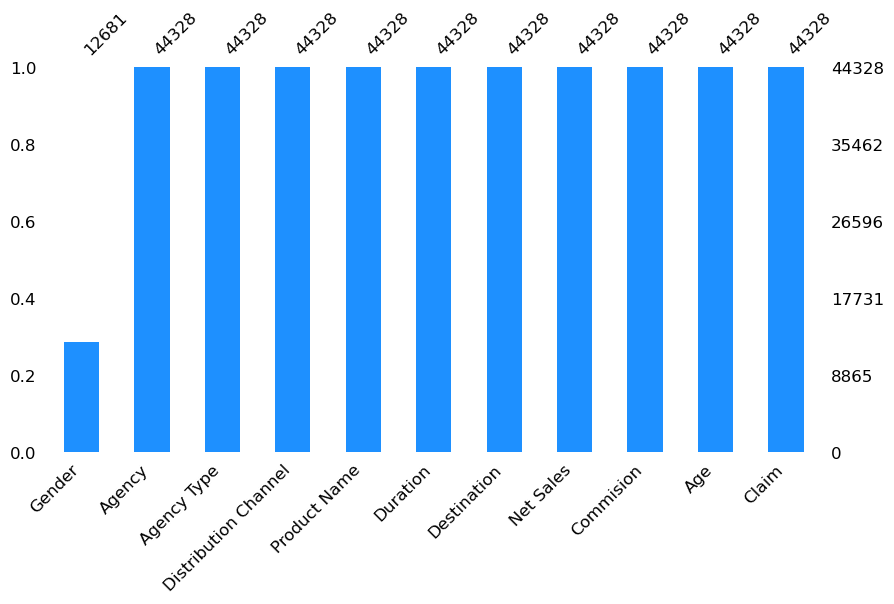

In [97]:
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<Axes: >

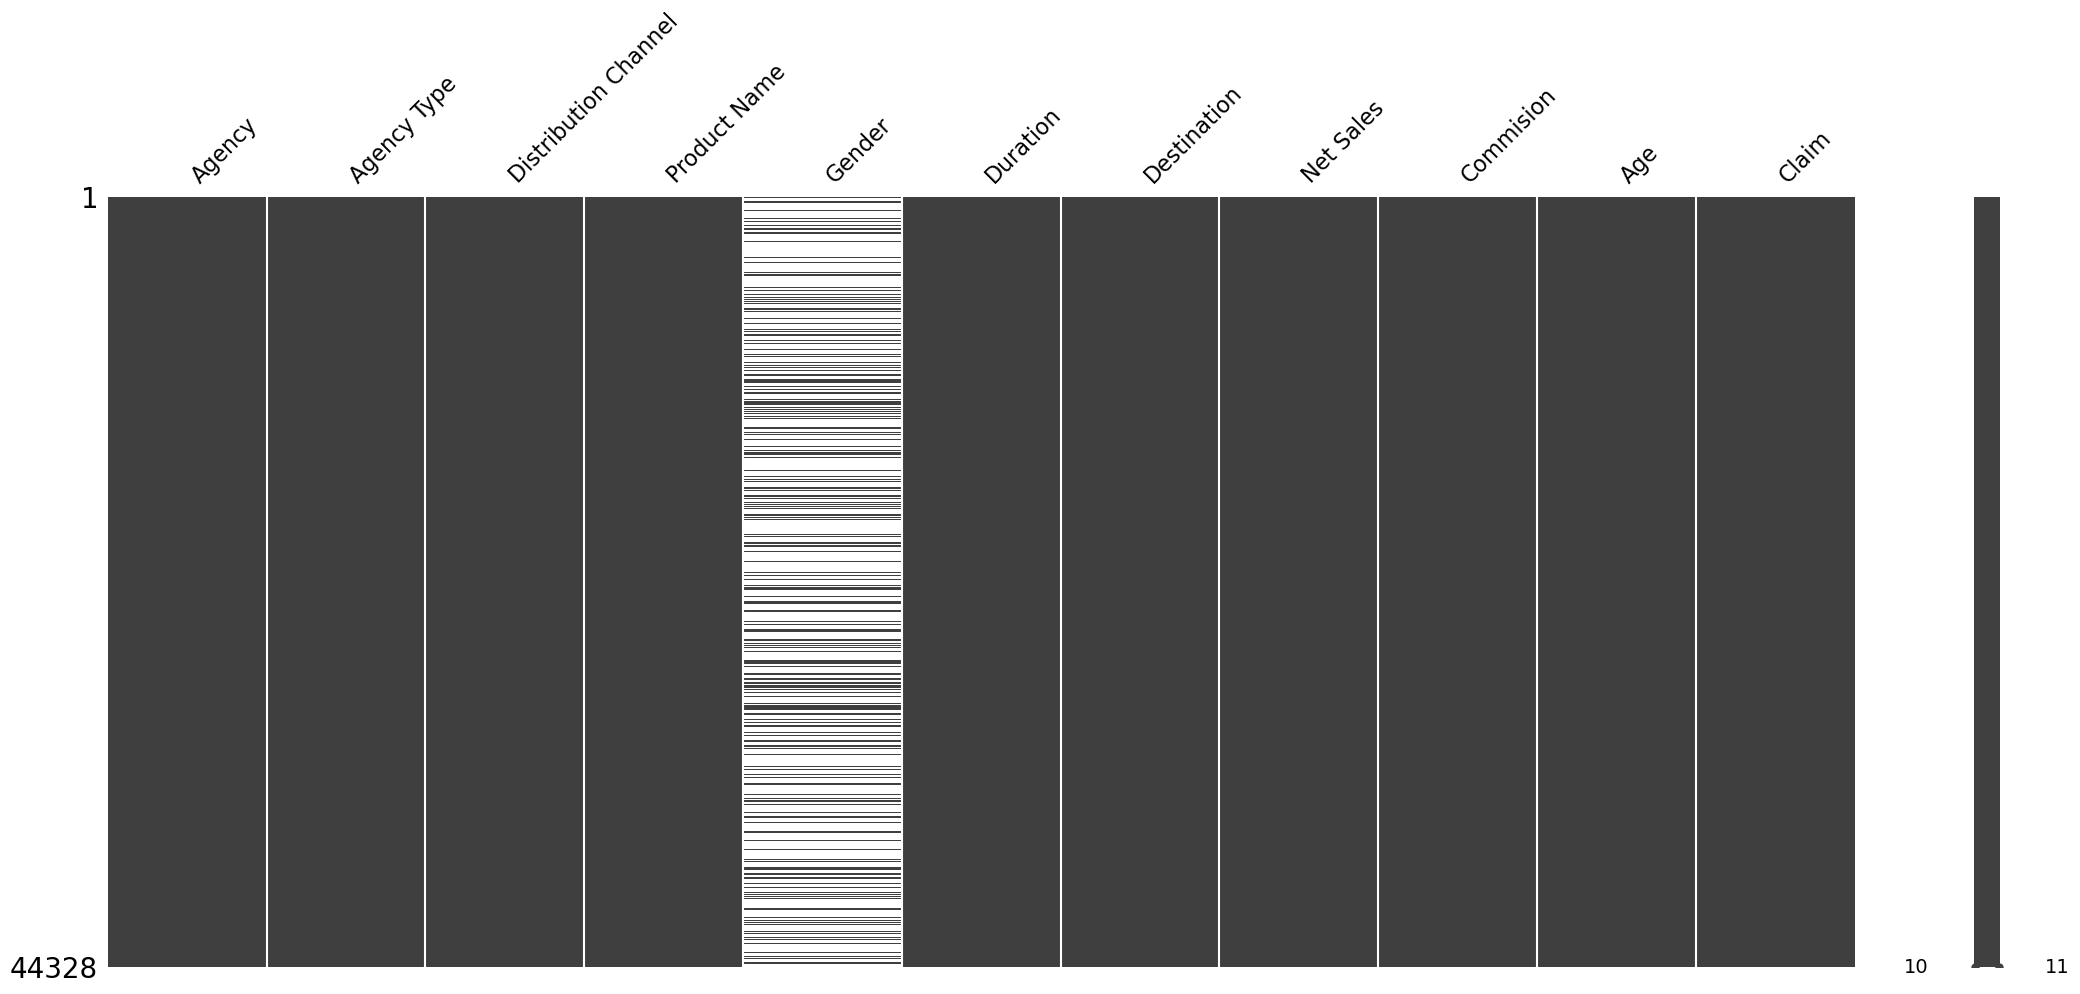

In [98]:
msno.matrix(df)

<Axes: >

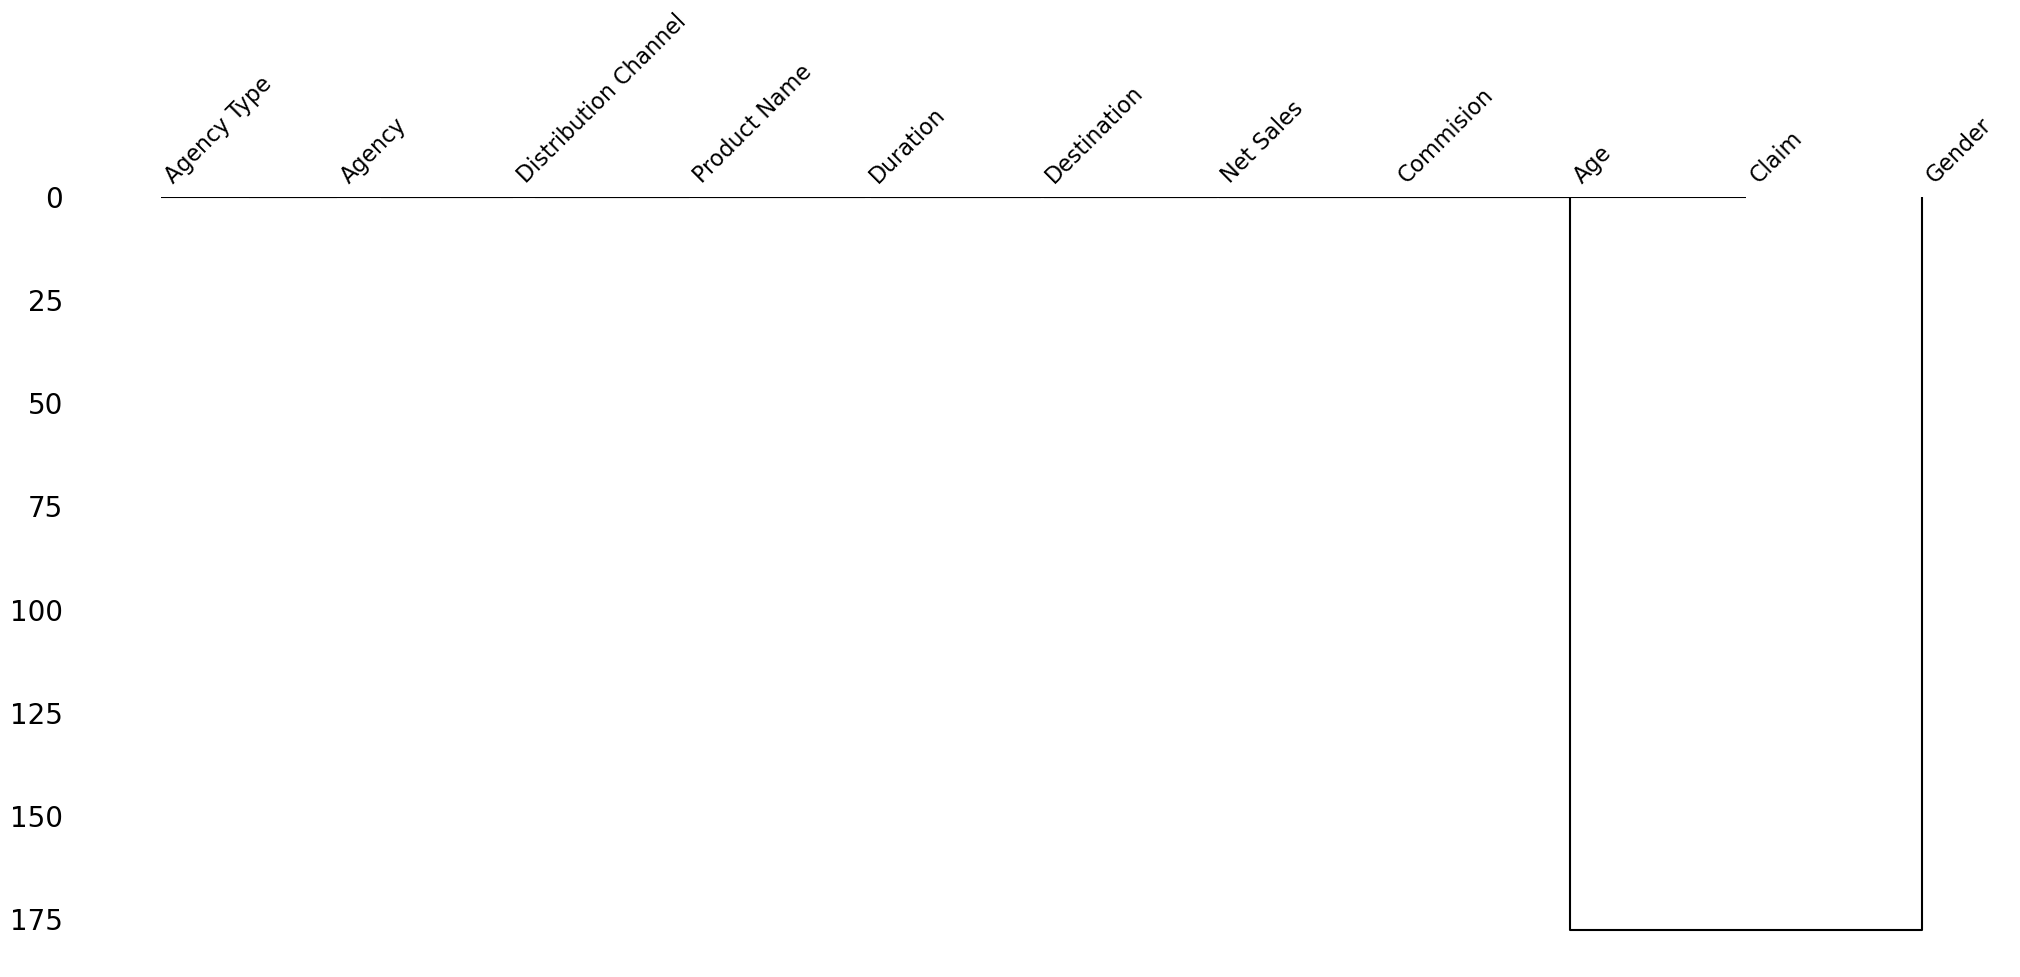

In [99]:
msno.dendrogram(df)

Melalui visualisasi Barchart dan Matrix, missing value hanya ditemukan pada kolom Gender (jenis kelamin) dan hanya terisi sebanyak 28,61% dari total keseluruhan data. Jika melihat dendrogram, kolom Gender hanya memiliki korelasi dengan kolum Age (umur). 

In [100]:
# Cek kelas Umur
pd.DataFrame({
    'Age_range':['10-19', '20-29', '30-39', '40-49', '50 or above'],
    'missing_values':[df[(df['Age']>=10) & (df['Age']<=19)].isna().sum().sum(),
                        df[(df['Age']>=20) & (df['Age']<=29)].isna().sum().sum(),
                        df[(df['Age']>=30) & (df['Age']<=39)].isna().sum().sum(),
                        df[(df['Age']>=40) & (df['Age']<=49)].isna().sum().sum(),
                        df[(df['Age']>=50)].isna().sum().sum()]
})

,Age_range,missing_values
0,10-19,26
1,20-29,2768
2,30-39,22059
3,40-49,3763
4,50 or above,3031


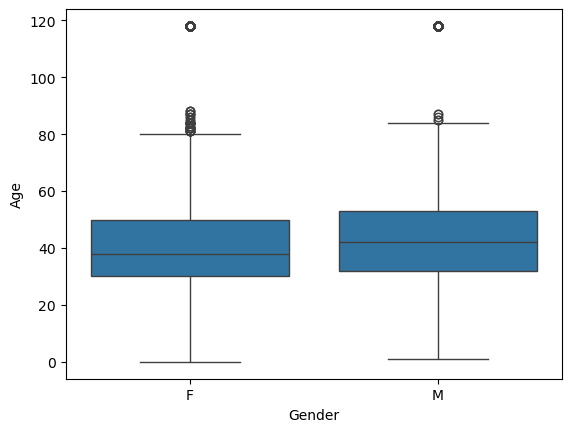

In [101]:
# cek korelasi antara Gender dan Age
sns.boxplot(x='Gender', y='Age', data=df)
plt.show()

In [102]:
# Ambil usia masing-masing gender (drop NaN biar aman)
df_gendered = df[df['Gender'].isin(['M', 'F'])]

age_female = df_gendered[df_gendered['Gender'] == 'F']['Age'].dropna()
age_male = df_gendered[df_gendered['Gender'] == 'M']['Age'].dropna()

# Uji Mann–Whitney U
stat, p = mannwhitneyu(age_female, age_male, alternative='two-sided')

print(f"Median Female: {age_female.median()}")
print(f"Median Male: {age_male.median()}")
print(f"Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Perbedaan median usia antara pria dan wanita signifikan.")
else:
    print("Tidak ada perbedaan signifikan pada median usia.")

Median Female: 38.0
Median Male: 42.0
Statistic: 17930419.5, p-value: 1.1527451217998662e-25
Perbedaan median usia antara pria dan wanita signifikan.


In [103]:
# Tes Feature Importance
# 1. Copy dataset biar aman
df_copy = df.copy()

# 2. Isi NaN Gender dengan "Unknown"
df_copy["Gender"] = df_copy["Gender"].fillna("Unknown")

# 3. Pisahkan X dan y
X = df_copy.drop(columns=["Claim"])
y = df_copy["Claim"]

# 4. One-hot encoding untuk fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

# 5. Split train-test¸
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 6. Fit RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 7. Urutkan feature importance
feature_importance = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
0,Duration,0.345073
3,Age,0.284672
1,Net Sales,0.167909
2,Commision,0.102678
46,Gender_M,0.015948
...,...,...
135,Destination_NIGERIA,0.000000
61,Destination_BOTSWANA,0.000000
94,Destination_GUINEA-BISSAU,0.000000
153,Destination_SAMOA,0.000000


Mayoritas pemegang pendaftar asuransi yang tidak mencantumkan data umur adalah kelompok berumur 30-39 tahun.

Pada boxplot, umur dari Pria memiliki median umur yang lebih tua daripada Wanita. Berdasarkan uji signifikan, median keduanya memiliki perbedaan dimana Wanita merupakan kelompok umur 30-39 dan Pria kelompok umur 40-49.

Berdasarkan pengelompokkan umur dan median persebaran, data gender tidak dapat secara acak diimputasi ke berdasarkan prinsip bahwa akan lebih banyak kelompok Pria di kelompok usia 40-42 tahun dan Wanita pada kelompok usia 30-39 tahun. 

Berdasarkan feature importance dapat terlihat juga bahwa Gender_M menepati posisi ke 5 sebagai fitur yang berpengaruh tetapi nilai pengaruhnya <0.05 atau hanya sebesar 1,5% saja.

Selain itu, pengajuan asuransi perjalanan umumnya mengharuskan pemohon untuk mengisi data secara lengkap dan benar. Oleh karena itu, kolom Gender yang memiliki nilai kosong hampir 70% dapat dihapus agar model dapat memprediksi data lainnya yang masih tersedia.

In [104]:
# Menghapus data kosong (jika masih ada) dan kolom Gender
df.drop(columns=['Gender'], inplace=True)

In [105]:
# Dataset sudah bebas dari kolom Gender
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


In [106]:
# Cek kembali apakah masih ada missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Duration              44328 non-null  int64  
 5   Destination           44328 non-null  object 
 6   Net Sales             44328 non-null  float64
 7   Commision             44328 non-null  float64
 8   Age                   44328 non-null  int64  
 9   Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.4+ MB


### 2. Data Duplicate

Selain missing value, data duplikat juga harus diamati dan ditangani agar model tidak membaca data yang sama dua kali dan menyebabkan terjadi Overfitting.

In [107]:
# Cek data duplikat
df[df.duplicated()]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
360,EPX,Travel Agency,Online,Cancellation Plan,6,MALAYSIA,10.0,0.00,36,No
473,EPX,Travel Agency,Online,Cancellation Plan,11,MALAYSIA,10.0,0.00,36,No
488,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,3,MALAYSIA,20.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,49,VIET NAM,20.0,0.00,36,No
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,5,THAILAND,29.7,17.82,38,No
44313,EPX,Travel Agency,Online,Cancellation Plan,5,CHINA,14.0,0.00,36,No
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,5,THAILAND,20.0,0.00,36,No


Terdapat **5.004 entri** data duplicate sehingga kita dapat menghapus data tersebut untuk menghindari bias karena ML belajar informasi yang sama.

In [108]:
# Menghapus data duplicate
df.drop_duplicates(keep='first', inplace=True)

In [109]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


## 3. Data Anomali

Selain data hilang dan data duplikat, kita juga harus memperhatikan data anomali atau data yang terisi tetapi jauh dari konteks atau secara logika tidak mungkin terjadi. Penangganan data anamali dilakukan dengan mengecek unique value pada tiap kolom.

In [110]:
# Cek apakah kolom agency memiliki data anomali (Lebih dari 3 kode nama)
df["Agency"].unique()

array(['C2B', 'EPX', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'SSI', 'RAB',
       'KML', 'TST', 'TTW', 'JWT', 'ADM', 'CCR', 'CBH'], dtype=object)

In [111]:
# Cek apakah kolom Duration memiliki data anomali (Bukan bilangan bulat atau minus)
sorted(df["Duration"].unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 

In [112]:
# Cek apakah kolom Destination memiliki data anomali (Bukan Negara atau Wilayah dari Negara)
df["Destination"].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKME

In [113]:
# Cek apakah kolom Umur memiliki data anomali (Umur minus)
sorted(df["Age"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 118]

Pada kolom Duration terdapat nilai minus (-1) hal ini tidak mungkin terjadi karena duration biasanya merepresentasikan lama waktu perjalanan sehingga waktu tidak akan pernah bernilai negatif sehingga data ini dapat dihilangkan.

Pada umur terdapat data yang menyatakan ada seseorang yang berumur 0 tahun dan lebih dari 100 tahun hal ini sedikit tidak masuk akal mengingat ini terkait asuransi perjalanan. Namun, data akan dipertahankan dan akan diproses setelah melihat data outliers.



In [114]:
# Hapus kolom Durasi yang minus
df = df[df['Duration'] >= 0]

In [115]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


## 4. Data Outlier

Selanjutnya, outlier pada kolom numerik perlu diperhatikan karena nilai yang terlalu besar dapat memengaruhi distribusi data, seperti mean, median, dan standar deviasi, sehingga model ML bisa menjadi bias. Kehadiran outlier ekstrem juga dapat membuat model terlalu fokus pada kasus yang jarang terjadi, mengurangi akurasi prediksi untuk data normal, serta mempersulit interpretasi dan visualisasi data. Oleh karena itu, identifikasi dan penanganan outlier penting untuk memastikan model dapat membaca dan memprediksi data secara akurat.

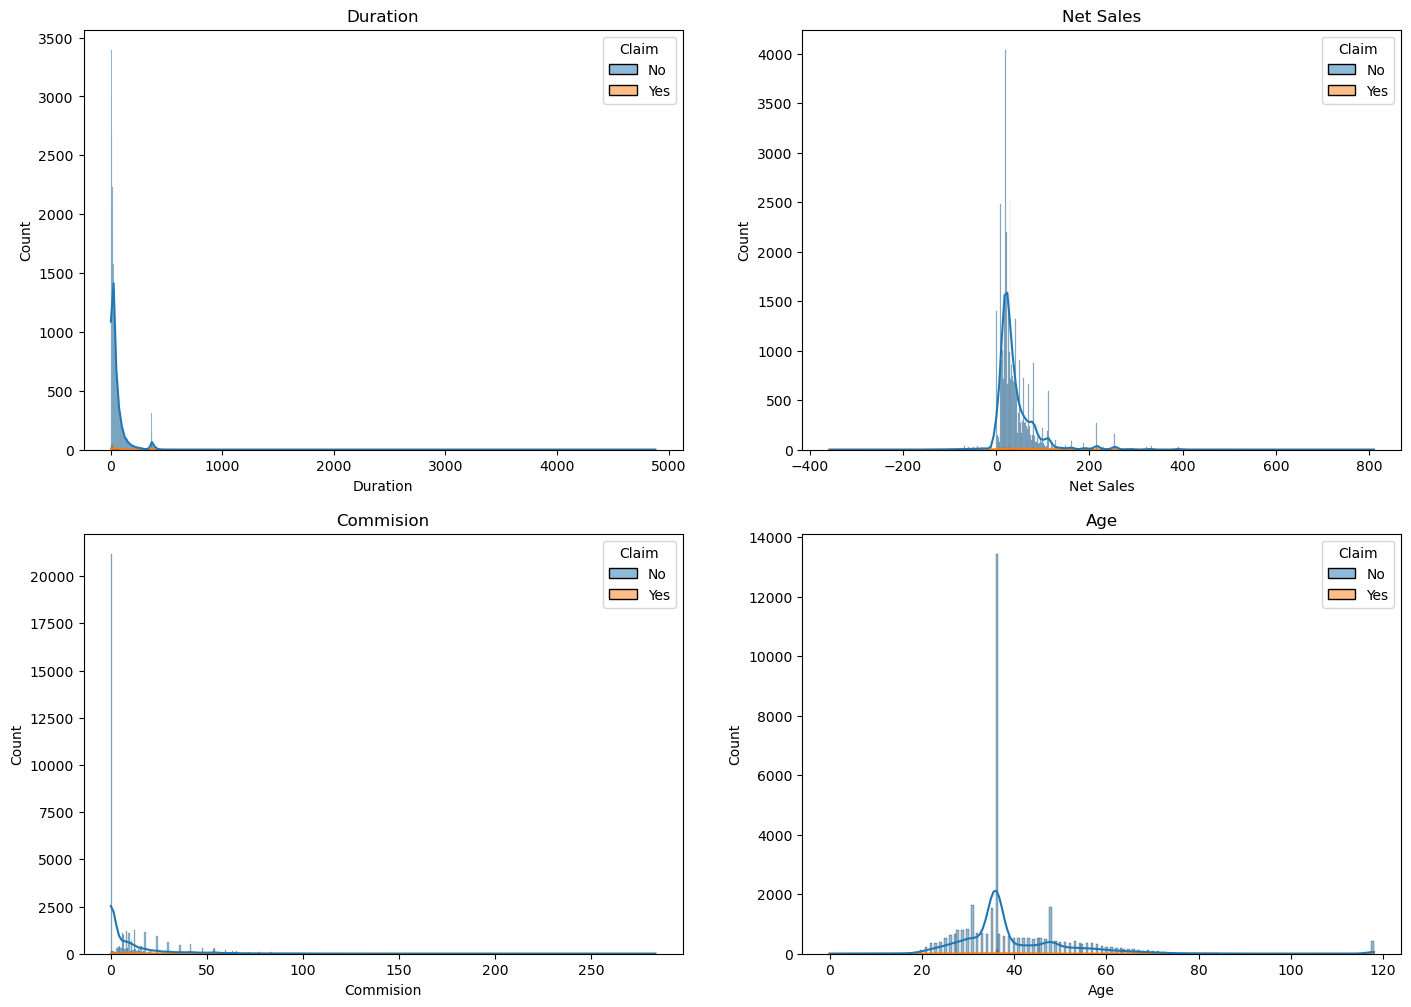

In [116]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Duration',hue='Claim',kde=True)
plt.title('Duration')

plt.subplot(222)
sns.histplot(data=df,x='Net Sales',hue='Claim',kde=True)
plt.title('Net Sales')

plt.subplot(223)
sns.histplot(data=df,x='Commision',hue='Claim',kde=True)
plt.title('Commision')

plt.subplot(224)
sns.histplot(data=df,x='Age',hue='Claim',kde=True)
plt.title('Age')

plt.show()

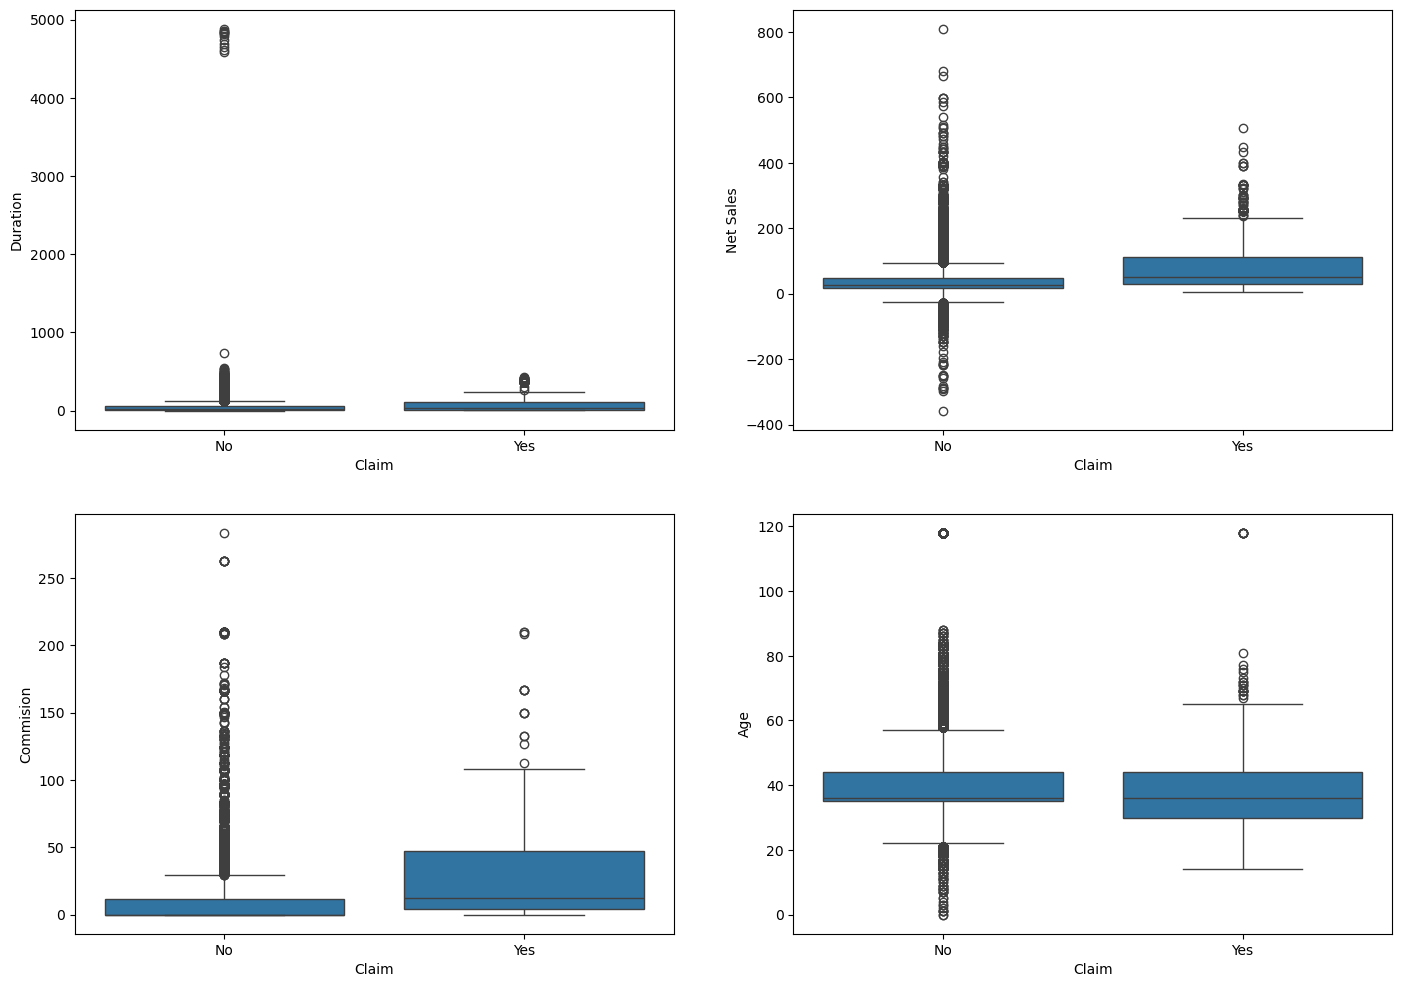

In [117]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df,y='Duration', x='Claim')

plt.subplot(222)
sns.boxplot(data=df,y='Net Sales', x='Claim')

plt.subplot(223)
sns.boxplot(data=df,y='Commision', x='Claim')

plt.subplot(224)
sns.boxplot(data=df,y='Age', x='Claim')
plt.show()

In [118]:
df.describe()

,Duration,Net Sales,Commision,Age
count,39322.000000,39322.000000,39322.000000,39322.000000
mean,52.278699,42.203761,10.386397,39.829078
std,113.407179,49.704994,20.345772,13.214075
min,0.000000,-357.500000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,35.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,44.000000
max,4881.000000,810.000000,283.500000,118.000000


Berdasarkan histogram dan boxplot tersebut terlihat bahwa pada data duration, commision, age, dan net sales memiliki outlier yang sangat besar. Selain itu, terlihat bahwa mayoritas data outlier berasal dari calon pelaku perjalanan yang tidak mengajukan klaim. 

**1. Duration**
- mean ≈ 52, std ≈ 113, max = 4881
- 75% data ≤ 57 → nilai 4881 jelas outlier ekstrem, jauh di atas interkuartil.

**2. Age**
- 75% ≤ 44, max = 118
- Nilai 118 → outlier karena sangat jarang ada manusia >100 tahun.
- Min = 0 → bisa dianggap missing/placeholder.

**3. Net Sales**
- min = -357.5, max = 810
- Nilai negatif (-357.5) bisa retur atau kesalahan input.
- Nilai max 810 jauh di atas 75% (50) → outlier.

**4. Commission**
- 75% ≤ 11.88, max = 283.5
- Nilai 283.5 jauh di atas 75% → outlier.
- Median = 0 → banyak yang 0, jadi distribusi skewed.

Penghapusan outlier tidak hanya dilakukan berdasarkan nilai yang berada di luar rentang kuartil dan median, tetapi juga mempertimbangkan ketentuan yang umumnya berlaku pada agen penyedia asuransi, seperti batas maksimum durasi perjalanan, besaran komisi, serta rentang usia calon pelaku perjalanan yang mengajukan asuransi.

Berdasarkan regulasi pada perusahaan asuransi perjalanan yang serupa (PT Zurich Asuransi Indonesia), lama durasi yang dapat diajukan umumnya mencapai 90-180 hari (perjalanan tahunan) tetapi beberapa perusahaan dapat menawarkan polis perjalanan tunggal dapat mengajukan asuransi dengan durasi 365 hari (1 tahun). Pada dataset juga mencangkup product asuransi dengan tipe Annual Plan sehingga durasi 365 hari memungkinkan untuk diikut sertakan.

Sementara untuk usia tidak ada batasan usia untuk mengajukan asuransi perjalanan tetapi terdapat batasan untuk biaya pengobatan sehingga pemohon dengan usia 76 tahun keatas akan dibatasi penerimaannya sebesar 25% dari rencana manfaat. Selain itu, angka harapan hidup sesorang umumnya berada pada rata-rata 70-80 tahun. 

Penghapusan outlier diawali dengan menghapus data dengan pengajuan durasi 365 hari dan menghapus data pada pemohon yang memiliki usia >80 tahun.

Source: https://www.danamon.co.id/-/media/ALL-CONTENT-PERSONAL-BANKING/Asuransi/Zurich-Travel-Insurance/3-RIPLay-ZTI-Umum-Danamon.pdf



In [119]:
## Menghapus data durasi outlier yang melebihi 12 bulan/365 hari
duration_outlier = df[df['Duration']>365]
duration_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
13,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,252.85,63.21,43,Yes
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,370,CHINA,204.60,132.99,39,Yes
53,C2B,Airlines,Online,Annual Silver Plan,366,SINGAPORE,216.00,54.00,37,No
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,No
...,...,...,...,...,...,...,...,...,...,...
44142,C2B,Airlines,Online,Annual Silver Plan,400,SINGAPORE,252.85,63.21,30,No
44210,C2B,Airlines,Online,Annual Gold Plan,378,SINGAPORE,333.00,83.25,47,No
44217,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,216.00,54.00,38,No
44224,C2B,Airlines,Online,Annual Silver Plan,390,SINGAPORE,301.00,75.25,48,Yes


In [120]:
# Menghapus data umur outlier yang melebihi usia 80 tahun
age_outlier = df[df['Age']>80]
age_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No
44140,JWT,Airlines,Online,Value Plan,84,INDIA,93.0,37.20,118,No


In [121]:
outlier_index = duration_outlier.index.union(age_outlier.index)
df = df.drop(outlier_index).reset_index(drop=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
37959,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
37960,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
37961,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
37962,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


Sebanyak **1.358 data outlier** pada kolom duration dan age telah dihapus, menyisakan **37.964 baris data**. Langkah berikutnya adalah memeriksa apakah penghapusan outlier tersebut memengaruhi distribusi data sehingga menjadi lebih mendekati distribusi normal.

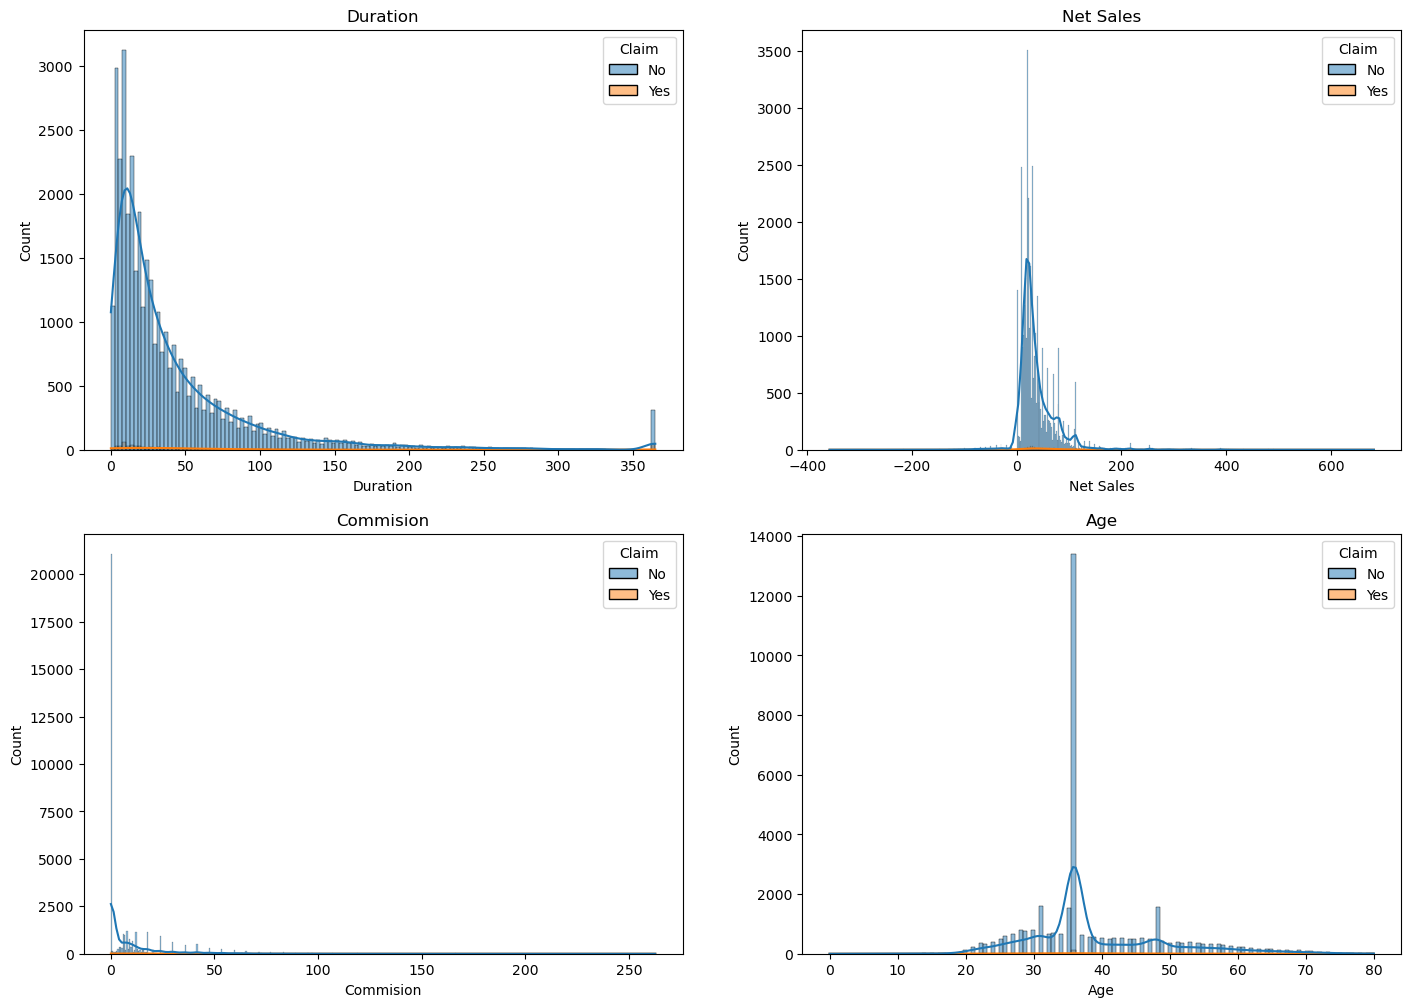

In [122]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Duration',hue='Claim',kde=True)
plt.title('Duration')

plt.subplot(222)
sns.histplot(data=df,x='Net Sales',hue='Claim',kde=True)
plt.title('Net Sales')

plt.subplot(223)
sns.histplot(data=df,x='Commision',hue='Claim',kde=True)
plt.title('Commision')

plt.subplot(224)
sns.histplot(data=df,x='Age',hue='Claim',kde=True)
plt.title('Age')

plt.show()

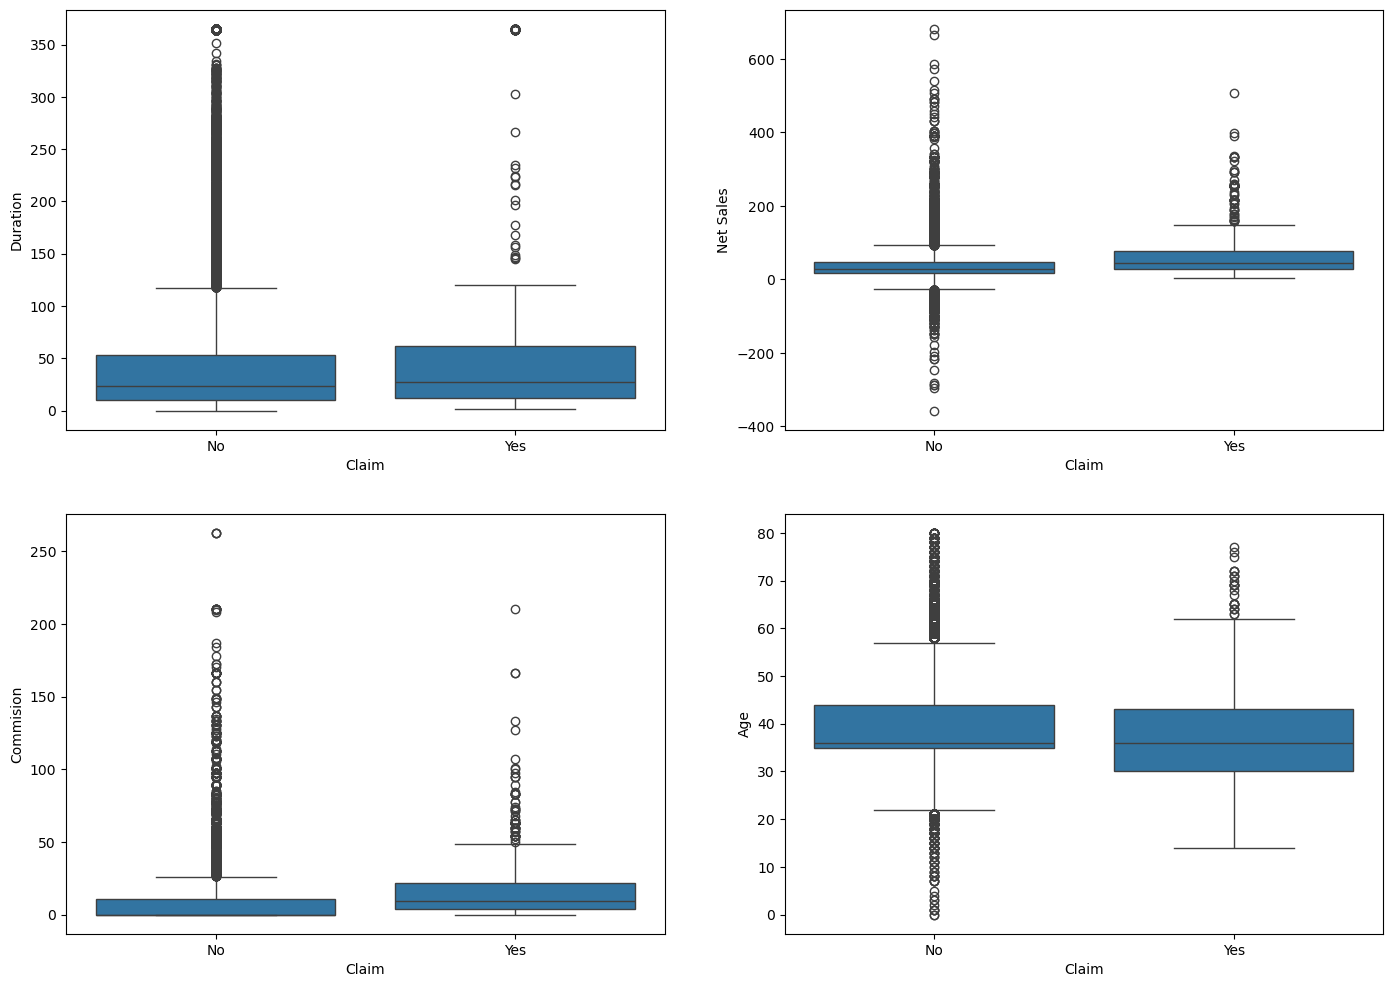

In [123]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df,y='Duration', x='Claim')

plt.subplot(222)
sns.boxplot(data=df,y='Net Sales', x='Claim')

plt.subplot(223)
sns.boxplot(data=df,y='Commision', x='Claim')

plt.subplot(224)
sns.boxplot(data=df,y='Age', x='Claim')
plt.show()

Distribusi pada kolom Commission, Net Sales, dan Age masih menunjukkan pola yang tidak normal. Pada Commission, terlihat lonjakan sangat tinggi di nilai 0 diikuti ekor panjang hingga lebih dari 250, yang kemungkinan mencerminkan banyak transaksi tanpa komisi atau adanya nilai yang tidak realistis. 

Net Sales sebagian besar terkonsentrasi di sekitar 0, namun terdapat nilai negatif yang mungkin disebabkan oleh refund serta ekor panjang ke arah nilai positif yang besar. 

Sementara itu, Age memperlihatkan puncak tajam di sekitar usia 35 tahun dengan distribusi yang tidak merata, mengindikasikan adanya potensi bias dari input data atau fokus pemasaran pada segmen usia tertentu.

Data tersebut masih perlu dilakukan penghapusan outlier khususnya pada Net Sales, dan Commision.

In [124]:
df.describe()

,Duration,Net Sales,Commision,Age
count,37964.000000,37964.000000,37964.000000,37964.000000
mean,43.363713,37.908094,8.853532,38.848567
std,55.958215,39.416669,17.045383,10.239317
min,0.000000,-357.500000,0.000000,0.000000
25%,10.000000,18.500000,0.000000,34.000000
50%,24.000000,28.000000,0.000000,36.000000
75%,53.000000,49.000000,10.500000,44.000000
max,365.000000,682.000000,262.760000,80.000000


**Net Sales**

Pada kolom Net Sales, terdapat nilai minimum sebesar -357,5 yang secara logis tidak mungkin terjadi dalam konteks penjualan normal, sehingga kemungkinan besar mencerminkan refund, koreksi, atau kesalahan input. Selain itu, nilai maksimum mencapai 810, yang berada sangat jauh di atas kuartil ketiga (Q3) sebesar 53, menunjukkan adanya ekor distribusi yang sangat panjang dan ekstrem. 

Menurut NerdWallet, biaya asuransi perjalanan umumnya berkisar antara 4% hingga 16% dari total biaya perjalanan, dengan rata-rata sekitar 6–7%. MarketWatch mencatat bahwa premi asuransi perjalanan rata-rata berada di kisaran $204, namun dapat bervariasi mulai dari 14-765 USD tergantung pada jenis dan cakupan polis. Sementara itu, data dari Squaremouth menunjukkan bahwa premi tahunan (*annual plan*) biasanya berkisar antara 130-1.690 USD, dengan rata-rata sekitar 328 USD per tahun. 

Pada data set terdapat nilai Net Sales yang negatif yang diasumsikan sebagai refund dan mungkin terjadi untuk kasus-kasus khusus dan baik untuk pembelajaran model apabila menemukan kasus yang serupa. Namun, outlier terlalu besar sehingga akan dibatasi menjadi -100 USD

Oleh karena itu, rentang polis yang akan digunakan berkisar pada -100 hingga 350 USD, data yang tidak memenuhi rentang tersebut akan dihapus. 

Source: 
- https://www.nerdwallet.com/article/travel/how-much-is-travel-insurance
- https://www.marketwatch.com/insurance-services/travel-insurance/travel-insurance-cost/
- https://www.squaremouth.com/plans/annual

In [125]:
# Hitung persentase komisi hanya sementara
commission_pct = (df['Commision'] / df['Net Sales']) * 100
commission_pct

0        25.0
1         0.0
2        35.0
3         0.0
4        25.0
         ... 
37959     0.0
37960    60.0
37961    35.0
37962     0.0
37963     inf
Length: 37964, dtype: float64

In [126]:
# Atur logika jika Net Sales = 0 maka commision = 0
df_dupe = df.copy()
df_dupe['commision_pct'] = np.where(
    df_dupe['Net Sales'] == 0,
    0,
    (df_dupe['Commision'] / df_dupe['Net Sales']) * 100
)
df_dupe[['Commision', 'commision_pct']]

,Commision,commision_pct
0,54.00,25.0
1,0.00,0.0
2,7.70,35.0
3,0.00,0.0
4,4.00,25.0
...,...,...
37959,0.00,0.0
37960,47.52,60.0
37961,10.50,35.0
37962,0.00,0.0


In [127]:
df_dupe.describe()

,Duration,Net Sales,Commision,Age,commision_pct
count,37964.000000,37964.000000,37964.000000,37964.000000,37964.000000
mean,43.363713,37.908094,8.853532,38.848567,16.213374
std,55.958215,39.416669,17.045383,10.239317,22.864035
min,0.000000,-357.500000,0.000000,0.000000,-65.018868
25%,10.000000,18.500000,0.000000,34.000000,0.000000
50%,24.000000,28.000000,0.000000,36.000000,0.000000
75%,53.000000,49.000000,10.500000,44.000000,35.000000
max,365.000000,682.000000,262.760000,80.000000,65.018868


**Commision**

Pada kolom commision, nilai maximum yang dimiliki adalah 262.76 USD yang merupakan outlier sangat jauh dari data 75% lainnya yaitu 10.5 USD. Namun jika kita menghitung persentase komisi yang didapatkan oleh perusahaan yaitu dengan Commision dibagi Net Sales dikalikan 100 maka dapat terlihat persentase yang akan menjadi acuan berapa besar komisi yang umumnya diterima oleh suatu perusahaan.

Blog pemasaran Xoxoday menyebutkan bahwa komisi untuk travel insurance dapat berada di antara 15% hingga 40% dari premi. Menurut Travel Weekly, komisi rata-rata dalam industri asuransi perjalanan diperkirakan sekitar 28%. Oleh karena itu untuk meminimalisir outlier maka data yang memiliki persentase komisi >40% dapat dihapus.

Source: 
- https://www.travelweekly.com/Travel-News/Travel-Agent-Issues/Insights/Selling-clients-on-travel-insurance
- https://blog.xoxoday.com/compass/commission-for-travel-agents/


In [128]:
# Menghapus data Net Sales yang memiliki nilai <1
netsales_outlier = df_dupe[(df_dupe['Net Sales'] < -100) | (df_dupe['Net Sales'] > 400)]
netsales_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim,commision_pct
90,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-216.75,54.19,36,No,-25.001153
1125,C2B,Airlines,Online,Gold Plan,185,SINGAPORE,491.50,122.88,26,No,25.001017
2266,ADM,Travel Agency,Online,Premier Plan,56,FRANCE,-147.00,55.86,22,No,-38.000000
2676,C2B,Airlines,Online,Annual Gold Plan,364,SINGAPORE,666.00,166.50,31,No,25.000000
3315,C2B,Airlines,Online,Annual Gold Plan,364,SINGAPORE,449.25,112.31,55,No,24.999444
...,...,...,...,...,...,...,...,...,...,...,...
35703,C2B,Airlines,Online,Gold Plan,185,SINGAPORE,491.50,122.88,23,No,25.001017
36856,EPX,Travel Agency,Online,2 way Comprehensive Plan,63,JAPAN,-112.00,0.00,26,No,-0.000000
37177,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-289.00,72.25,30,No,-25.000000
37203,EPX,Travel Agency,Online,2 way Comprehensive Plan,56,AUSTRALIA,-112.00,0.00,36,No,-0.000000


In [129]:
# Menghapus data commision_pct yang lebih dari 40%
commision_pct_outlier = df_dupe[df_dupe['commision_pct']>40.00]
commision_pct_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim,commision_pct
25,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,56,UNITED STATES,19.8,11.88,33,No,60.0
29,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,FINLAND,29.7,17.82,31,No,60.0
31,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,9,SRI LANKA,36.0,23.40,29,No,65.0
35,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,12,SPAIN,9.9,5.94,26,No,60.0
42,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,MALAYSIA,29.7,17.82,27,No,60.0
...,...,...,...,...,...,...,...,...,...,...,...
37926,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,10,AUSTRALIA,29.7,17.82,31,No,60.0
37930,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,160,NEW ZEALAND,39.6,23.76,42,No,60.0
37938,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,20,AUSTRALIA,39.6,23.76,30,No,60.0
37943,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,6,AUSTRALIA,59.4,35.64,31,No,60.0


In [130]:
outlier_index = netsales_outlier.index.union(commision_pct_outlier.index)
df_dupe = df_dupe.drop(outlier_index).reset_index(drop=True)
df_dupe = df_dupe.drop(columns=['commision_pct'])
df_dupe

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
32802,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,THAILAND,40.0,0.00,36,No
32803,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
32804,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
32805,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


Sebanyak **5.160 data outlier** pada kolom net sales dan commision telah dihapus, menyisakan **32.807 baris data**. Langkah berikutnya adalah memeriksa apakah penghapusan outlier tersebut memengaruhi distribusi data sehingga menjadi lebih mendekati distribusi normal.

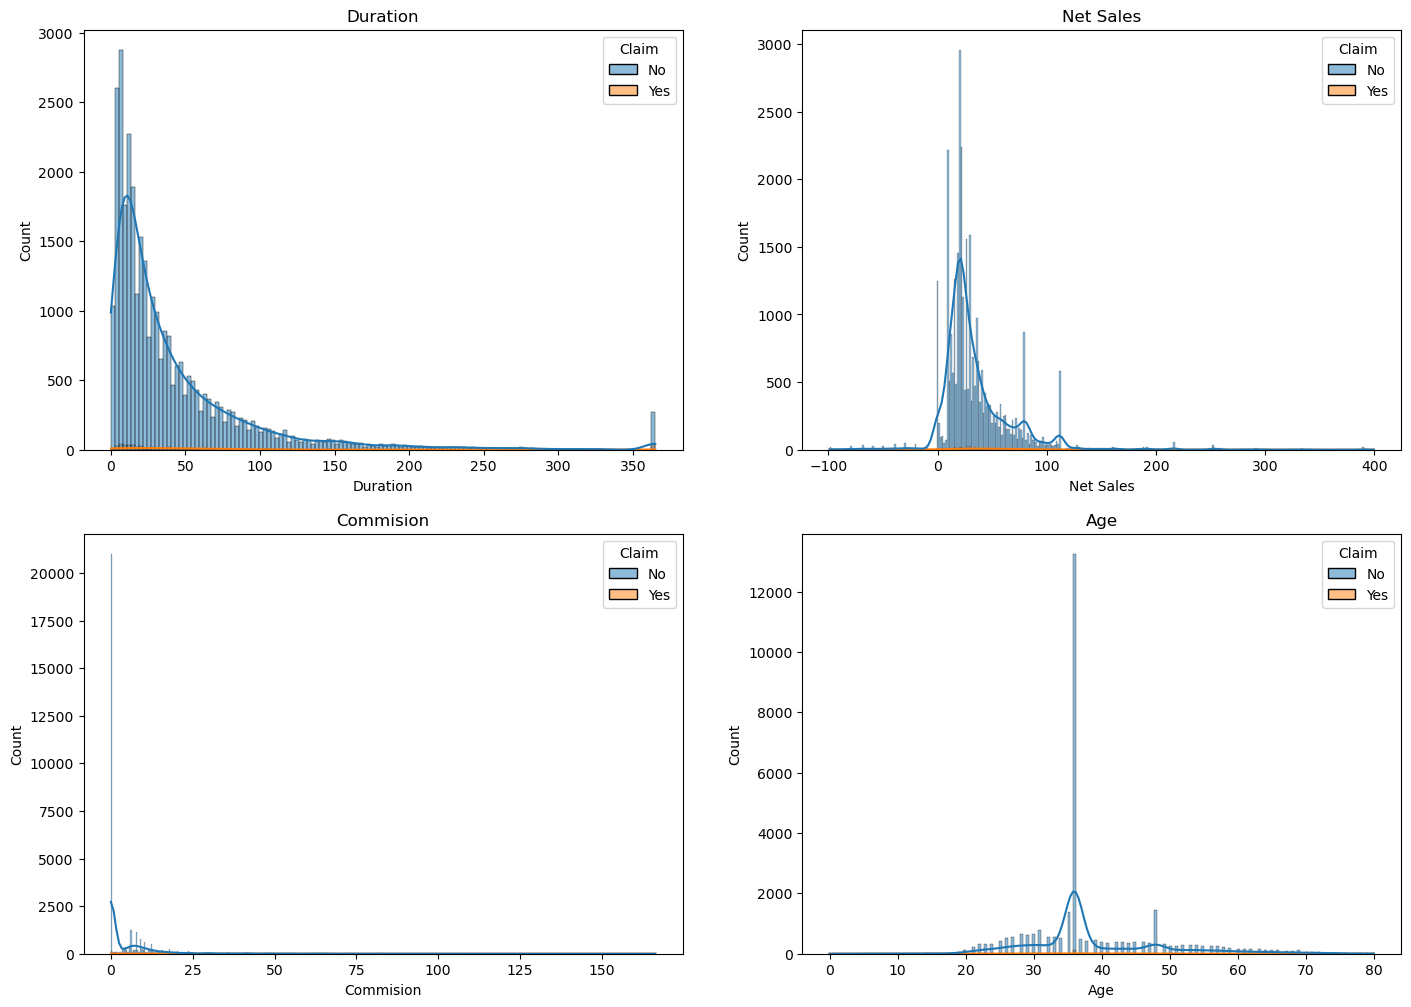

In [131]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df_dupe,x='Duration',hue='Claim',kde=True)
plt.title('Duration')

plt.subplot(222)
sns.histplot(data=df_dupe,x='Net Sales',hue='Claim',kde=True)
plt.title('Net Sales')

plt.subplot(223)
sns.histplot(data=df_dupe,x='Commision',hue='Claim',kde=True)
plt.title('Commision')

plt.subplot(224)
sns.histplot(data=df_dupe,x='Age',hue='Claim',kde=True)
plt.title('Age')

plt.show()



Meski outlier yang besar pada Net Sales dan Duration sudah dihapus, distribusi data tetap menunjukkan right-skewed, dengan banyak nilai rendah dan sedikit nilai tinggi. Untuk Commission, terlihat jelas adanya spike di 0, yang wajar mengingat ada sekitar 20 ribu data dengan komisi 0 (tidak dapat dihapus). Sementara itu, Age relatif lebih rapi, meski terdapat puncak di sekitar 35–40. Secara keseluruhan, meskipun outlier sudah dikurangi, distribusi intrinsik beberapa fitur—terutama fitur keuangan seperti Net Sales dan Commission memang tidak normal.

# III. Data Analysis

Data yang telah dibersihkan akan dianalisis untuk mengidentifikasi pola dan hubungan antar kolom melalui analisis univariate dan bivariate. Selain itu, akan dilakukan pengecekan feature importance untuk mengetahui fitur atau kolom mana yang memiliki pengaruh terbesar terhadap target (claim).

In [132]:
# Mengubah kolom 'Claim' (target) menjadi nilai 0 untuk tidak Claim dan 1 untuk yang Claim
df_dupe['Claim'] = np.where(df_dupe['Claim']=='Yes', 1, 0)

In [133]:
df_dupe

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
32802,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,THAILAND,40.0,0.00,36,0
32803,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
32804,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
32805,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


In [134]:
# Cek berapa banyak proporsi Claim setelah data dibersihkan (Claim = 1)
results_claim_dupe = df_dupe["Claim"].value_counts(dropna=False)
results_claim_dupe

Claim
0    32318
1      489
Name: count, dtype: int64

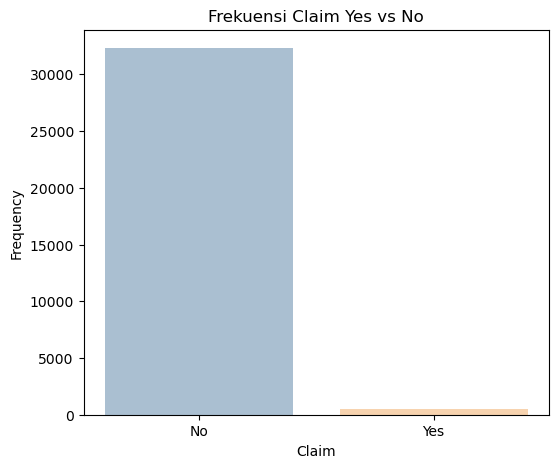

In [135]:
claim_counts = df_dupe['Claim'].value_counts()  # 1 = Yes, 0 = No

plt.figure(figsize=(6,5))
plt.bar(claim_counts.index.astype(str), claim_counts.values, color=['#86A4BE','#F5C18E'], alpha=0.7)
plt.title('Frekuensi Claim Yes vs No')
plt.xlabel('Claim')
plt.ylabel('Frequency')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [136]:
print("Persentase Claim Yes: " , (df_dupe['Claim'].value_counts()/len(df_dupe['Claim']) * 100))

Persentase Claim Yes:  Claim
0    98.509464
1     1.490536
Name: count, dtype: float64


Setelah data dibersihkan, proporsi data yang Claim tidak mengalami peningkatan yang jauh. Sebelum dibersihkan data dengan status claim No 98.48% dan Yes 1.51%, setelah dibersihkan proporsi status claim Yes berkurang menjadi 1.49% dan claim No menjadi 98.50%. Artinya pembersihan data tidak menimbulkan data bias dari dataset sehingga model tetap dapat mempelajari dataset asli yang memang unbalanced.

In [137]:
# Analisis Data Numerikal
df_dupe.describe()

,Duration,Net Sales,Commision,Age,Claim
count,32807.000000,32807.000000,32807.000000,32807.000000,32807.000000
mean,43.384186,35.177744,4.879951,38.568293,0.014905
std,56.239290,35.945731,10.701409,10.073740,0.121176
min,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,10.000000,18.000000,0.000000,35.000000,0.000000
50%,24.000000,25.500000,0.000000,36.000000,0.000000
75%,53.000000,43.000000,6.750000,42.000000,0.000000
max,365.000000,399.600000,166.320000,80.000000,1.000000


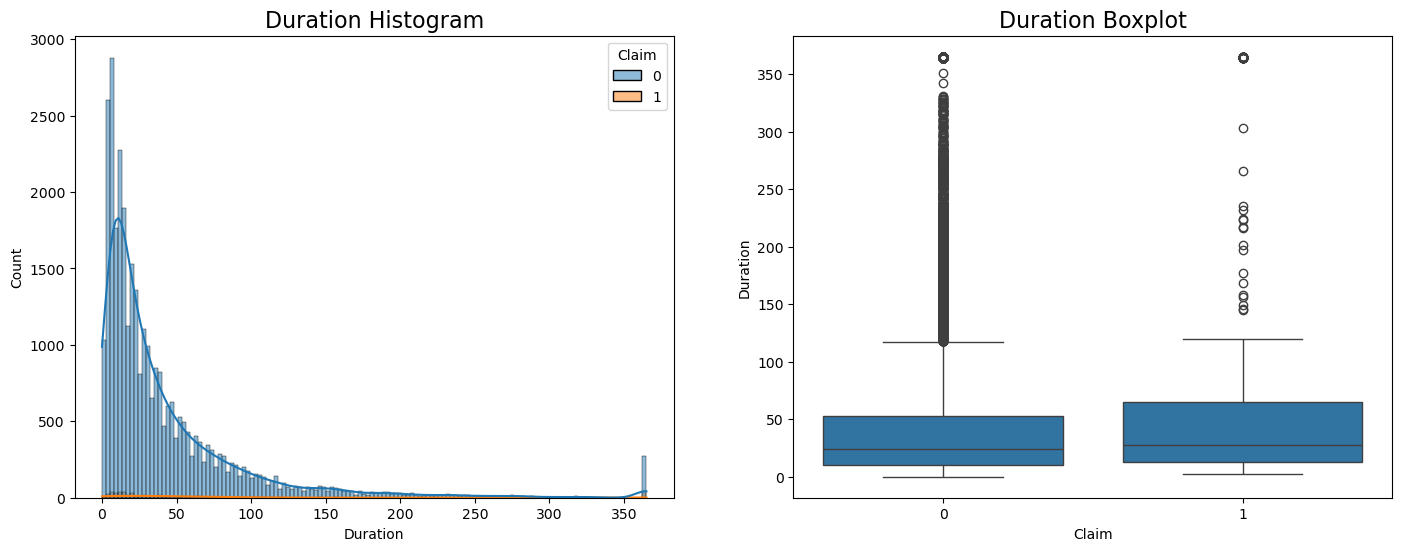

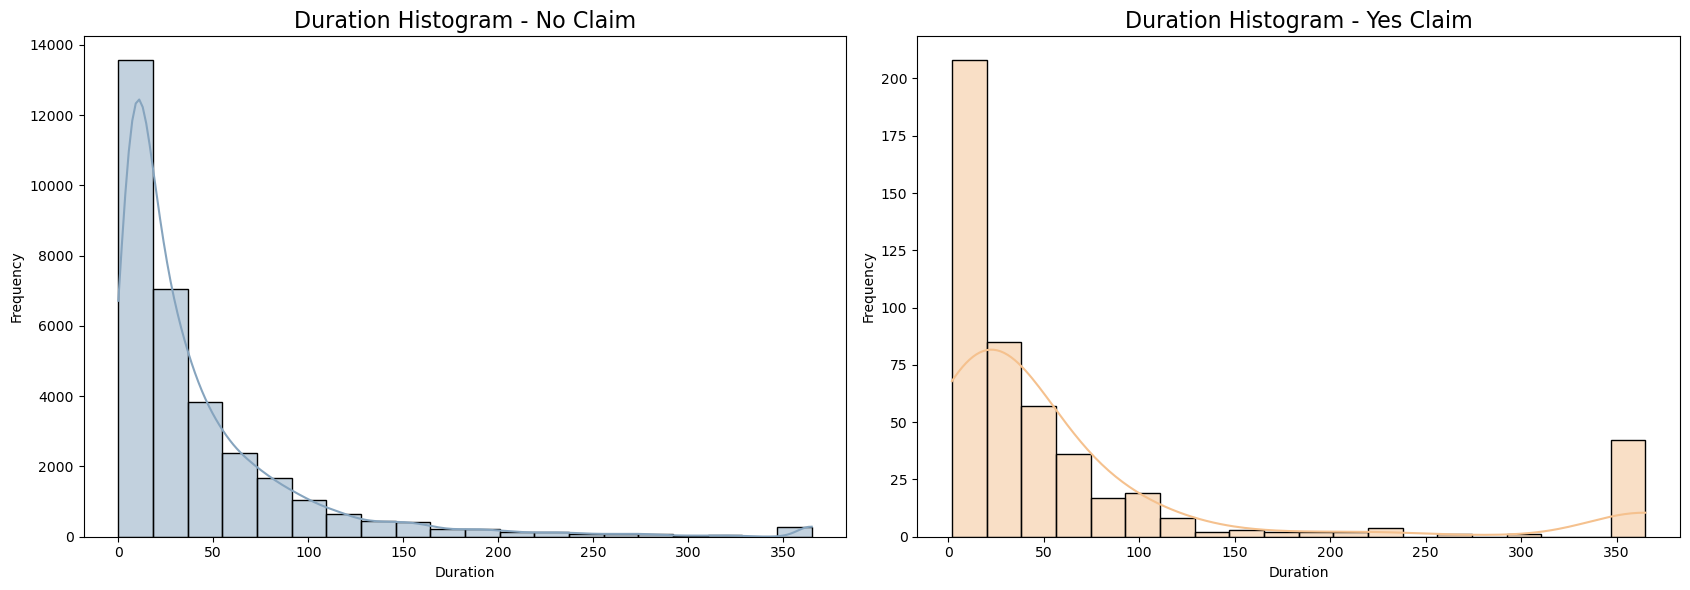

In [138]:
# Analisis Duration
plt.figure(figsize=(17,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(data=df_dupe, x='Duration', hue='Claim', kde=True)
plt.title('Duration Histogram', fontsize=16)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df_dupe, y='Duration', x='Claim')
plt.title('Duration Boxplot', fontsize=16)

# Hitrogram Masing-Masing Yes dan No
# Pisahkan data
yes_claim = df_dupe[df_dupe['Claim']==1]['Duration'].dropna()
no_claim = df_dupe[df_dupe['Claim']==0]['Duration'].dropna()

plt.figure(figsize=(17,6))

# Histogram No Claim
plt.subplot(1,2,1)
sns.histplot(no_claim, bins=20, color='#86A4BE', kde=True)
plt.title('Duration Histogram - No Claim', fontsize=16)
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Histogram Yes Claim
plt.subplot(1,2,2)
sns.histplot(yes_claim, bins=20, color='#F5C18E', kde=True)
plt.title('Duration Histogram - Yes Claim', fontsize=16)
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Destination**
- Kebanyakan perjalanan pendek, baik yang mengajukan klaim maupun tidak.

- Klaim (Yes) jarang terjadi, tapi cenderung muncul di perjalanan yang lebih panjang.

- Durasi bisa menjadi fitur yang berguna untuk prediksi klaim karena adanya kecenderungan klaim muncul di perjalanan panjang.

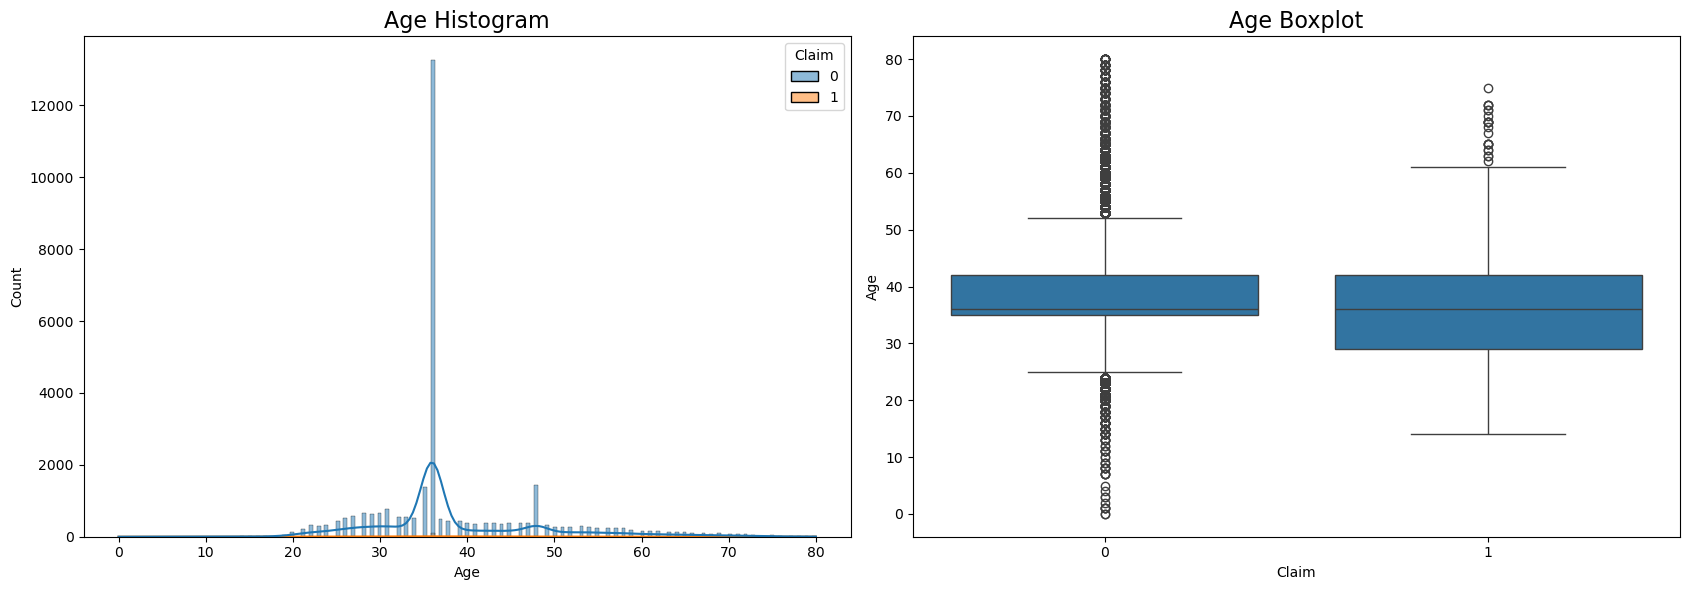

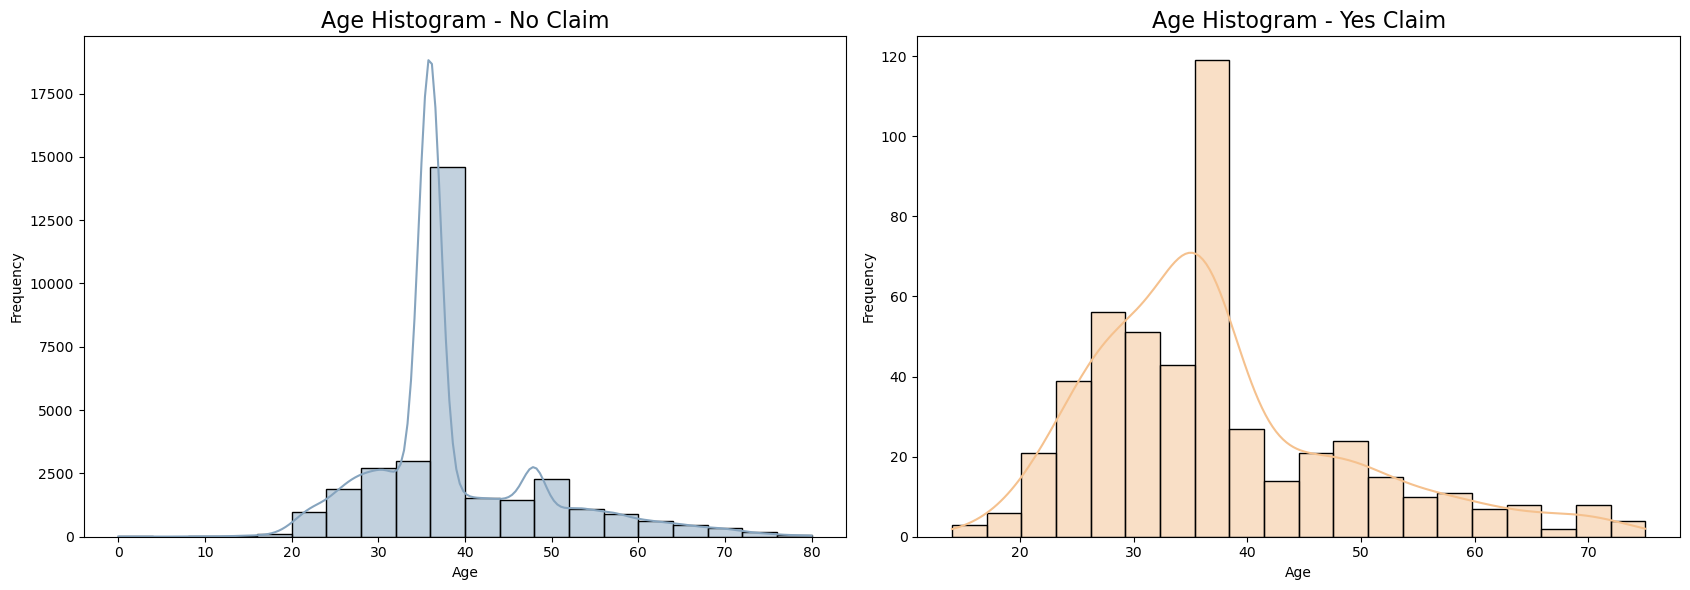

In [139]:
# Analisis Age
plt.figure(figsize=(17,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(data=df_dupe, x='Age', hue='Claim', kde=True)
plt.title('Age Histogram', fontsize=16)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df_dupe, y='Age', x='Claim')
plt.title('Age Boxplot', fontsize=16)

plt.tight_layout()
plt.show()

# Hitrogram Masing-Masing Yes dan No
# Pisahkan data
yes_claim = df_dupe[df_dupe['Claim']==1]['Age'].dropna()
no_claim = df_dupe[df_dupe['Claim']==0]['Age'].dropna()

plt.figure(figsize=(17,6))

# Histogram No Claim
plt.subplot(1,2,1)
sns.histplot(no_claim, bins=20, color='#86A4BE', kde=True)
plt.title('Age Histogram - No Claim', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram Yes Claim
plt.subplot(1,2,2)
sns.histplot(yes_claim, bins=20, color='#F5C18E', kde=True)
plt.title('Age Histogram - Yes Claim', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Age**

- Usia mayoritas pelanggan berada di 30–40 tahun.

- Klaim tidak terlalu tergantung pada usia, distribusi usia berdasarkan boxplot terlihat relatif simetris hanya pembedanya adalah proporsi pada kategori claim.

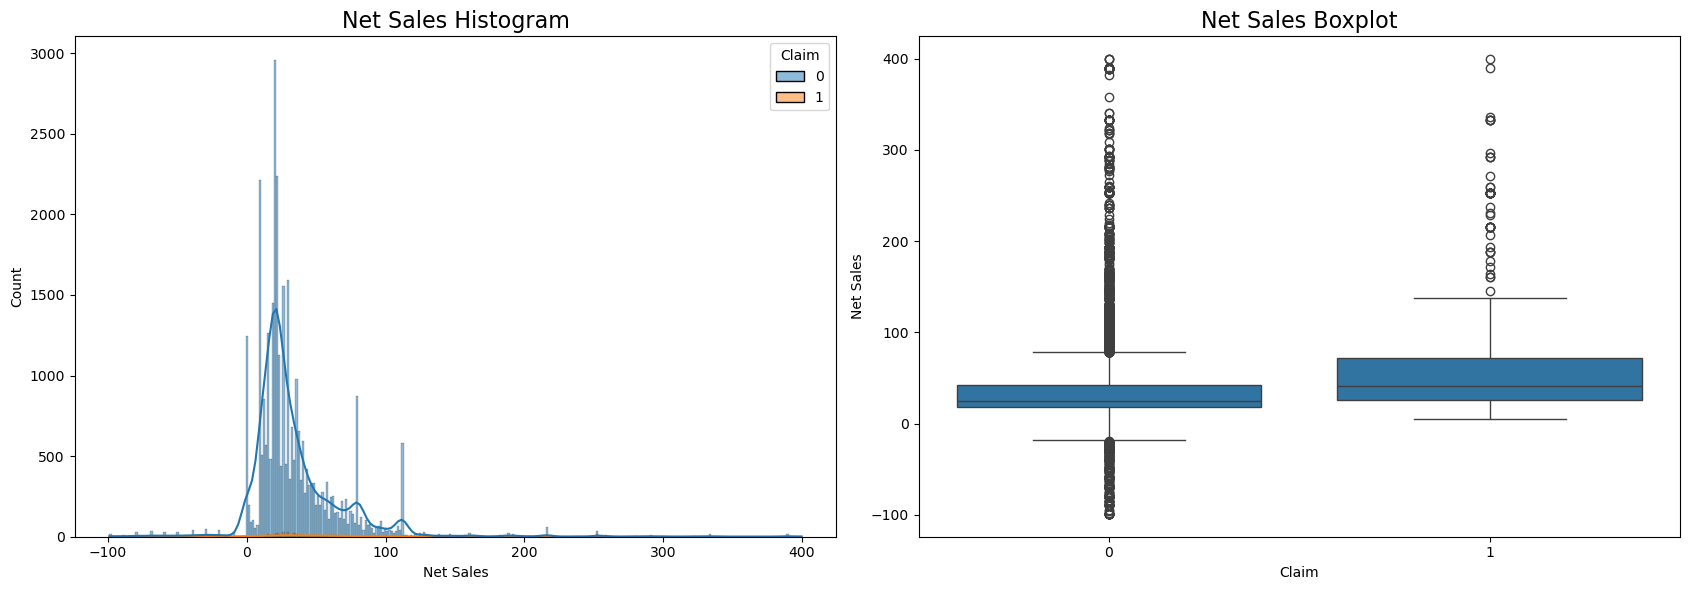

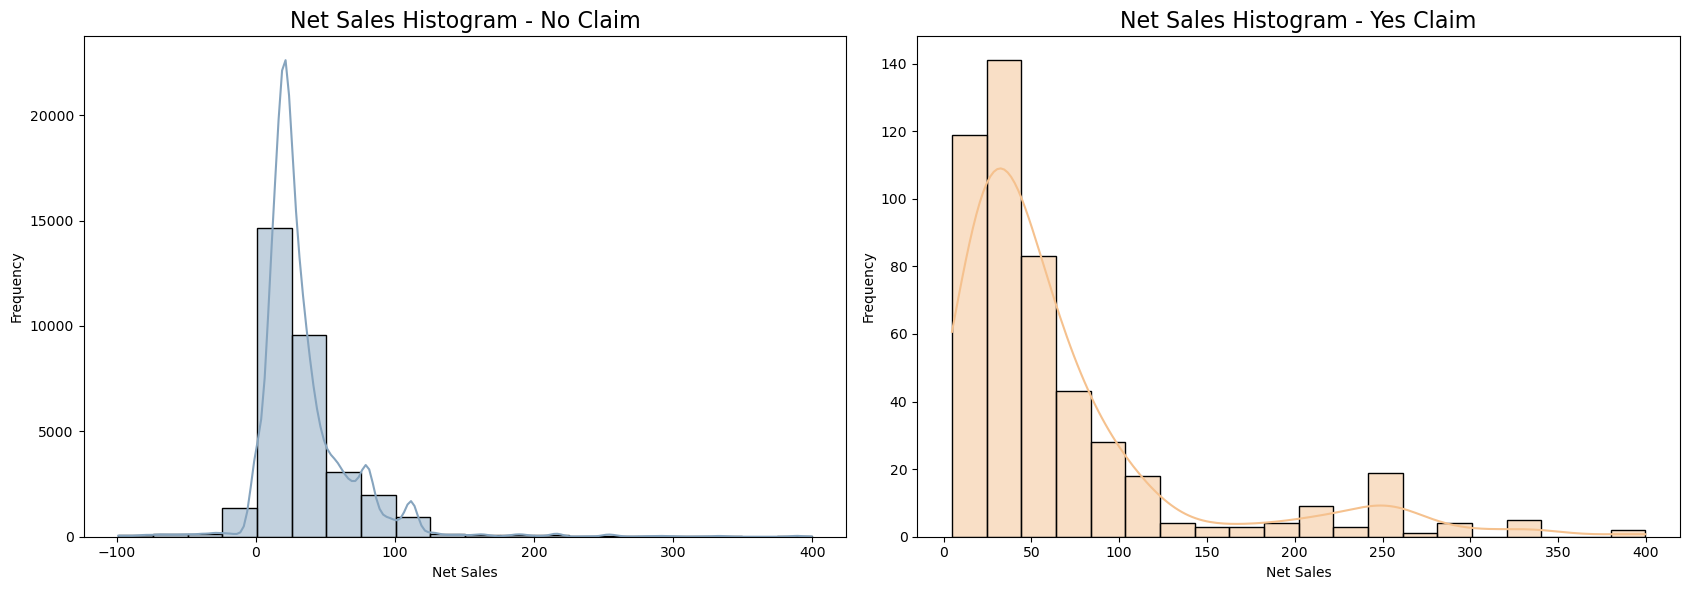

In [140]:
# Analisis Net Sales
plt.figure(figsize=(17,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(data=df_dupe, x='Net Sales', hue='Claim', kde=True)
plt.title('Net Sales Histogram', fontsize=16)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df_dupe, y='Net Sales', x='Claim')
plt.title('Net Sales Boxplot', fontsize=16)

plt.tight_layout()
plt.show()

# Hitrogram Masing-Masing Yes dan No
# Pisahkan data
yes_claim = df_dupe[df_dupe['Claim']==1]['Net Sales'].dropna()
no_claim = df_dupe[df_dupe['Claim']==0]['Net Sales'].dropna()

plt.figure(figsize=(17,6))

# Histogram No Claim
plt.subplot(1,2,1)
sns.histplot(no_claim, bins=20, color='#86A4BE', kde=True)
plt.title('Net Sales Histogram - No Claim', fontsize=16)
plt.xlabel('Net Sales')
plt.ylabel('Frequency')

# Histogram Yes Claim
plt.subplot(1,2,2)
sns.histplot(yes_claim, bins=20, color='#F5C18E', kde=True)
plt.title('Net Sales Histogram - Yes Claim', fontsize=16)
plt.xlabel('Net Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Net Sales**
- Sebaran net Sales yang didapatkan perusahaan dari kelompok kedua kelompok  adalah <100 USD (transaksi kecil)
- Sementara boxplot memperlihatkan bahwa tidak ada perbedaan median Net Sales pada kelompok No Claim dan Yes Claim, tetapi kelompok No Claim memiliki kasus dengan Net Sales tertinggi.
- Pada kelompok No Claim terdapat Net sales negatif yang menandakan tidak ada keuntungan bersih tetapi terjadi pengeluaran yang bisa diasumsikan sebagai refund.
- Pada kelompok Yes Claim terlihat bahwa Net sales modus net sales yang didapatkan berada pada range yang lebih tinggi (>25 USD).

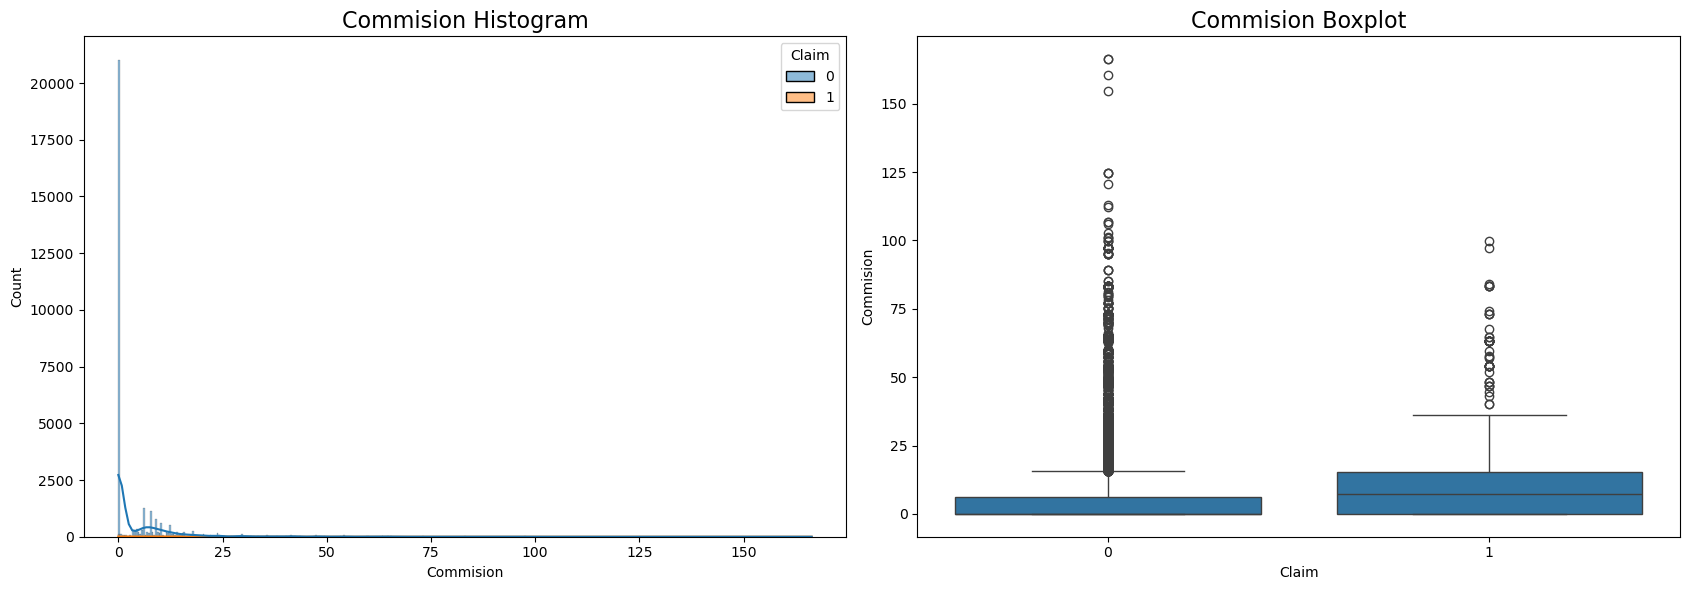

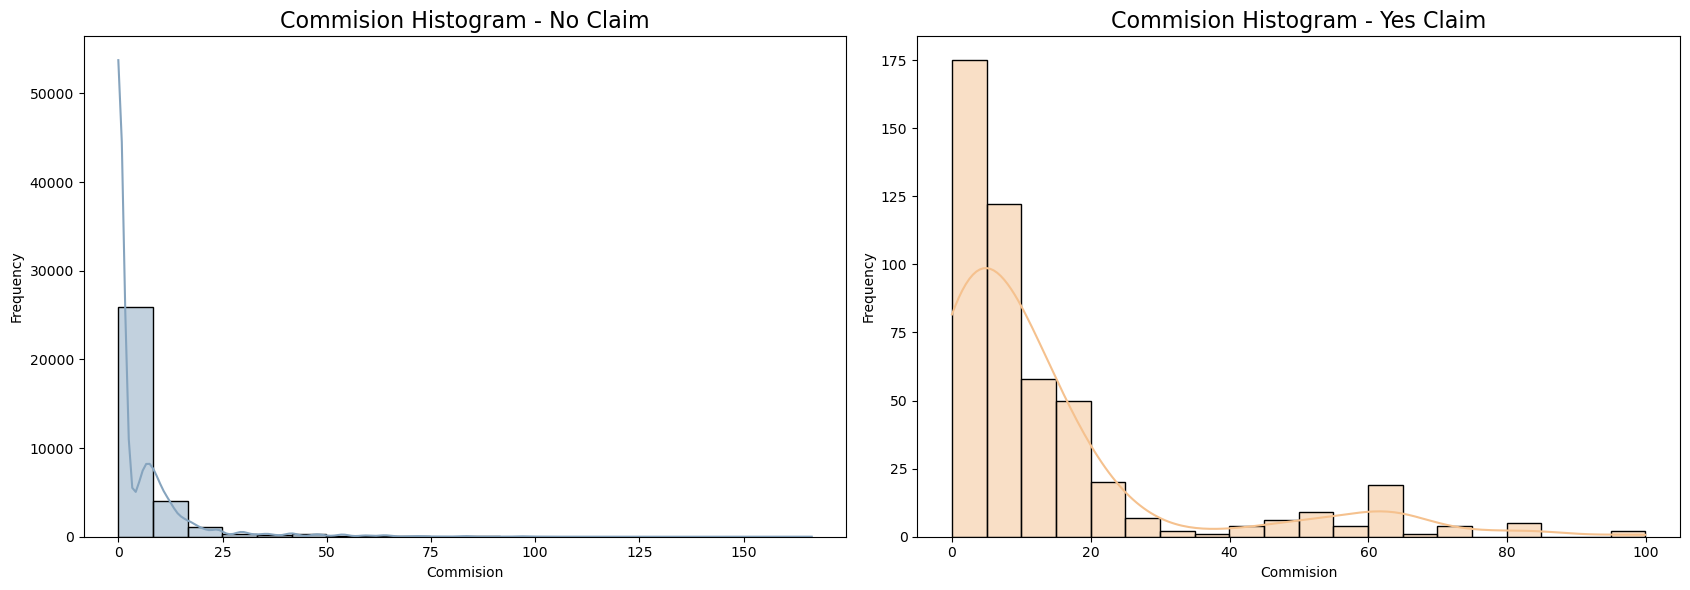

In [141]:
# Analisis Commision
plt.figure(figsize=(17,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(data=df_dupe, x='Commision', hue='Claim', kde=True)
plt.title('Commision Histogram', fontsize=16)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df_dupe, y='Commision', x='Claim')
plt.title('Commision Boxplot', fontsize=16)

plt.tight_layout()
plt.show()

# Hitrogram Masing-Masing Yes dan No
# Pisahkan data
yes_claim = df_dupe[df_dupe['Claim']==1]['Commision'].dropna()
no_claim = df_dupe[df_dupe['Claim']==0]['Commision'].dropna()

plt.figure(figsize=(17,6))

# Histogram No Claim
plt.subplot(1,2,1)
sns.histplot(no_claim, bins=20, color='#86A4BE', kde=True)
plt.title('Commision Histogram - No Claim', fontsize=16)
plt.xlabel('Commision')
plt.ylabel('Frequency')

# Histogram Yes Claim
plt.subplot(1,2,2)
sns.histplot(yes_claim, bins=20, color='#F5C18E', kde=True)
plt.title('Commision Histogram - Yes Claim', fontsize=16)
plt.xlabel('Commision')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Komisi**
- Terlihat bahwa sebagian besar komisi yang dikeluarkan untuk agen travel adalah 0, hal ini logis karena Net sales yang didapatkan juga terbilang kecil (<100 USD).
- Pada boxplot tidak terlihat perbedaan median pada kedua kelompok, tetapi kelompok Yes Claim secara normal memiliki distribusi data dengan Commision yang lebih tinggi dibanding No.
- Komisi yang diberikan pada kelompok Yes Claim lebih tinggi hal ini bisa terjadi karena net sales yang cenderung lebih tinggi.

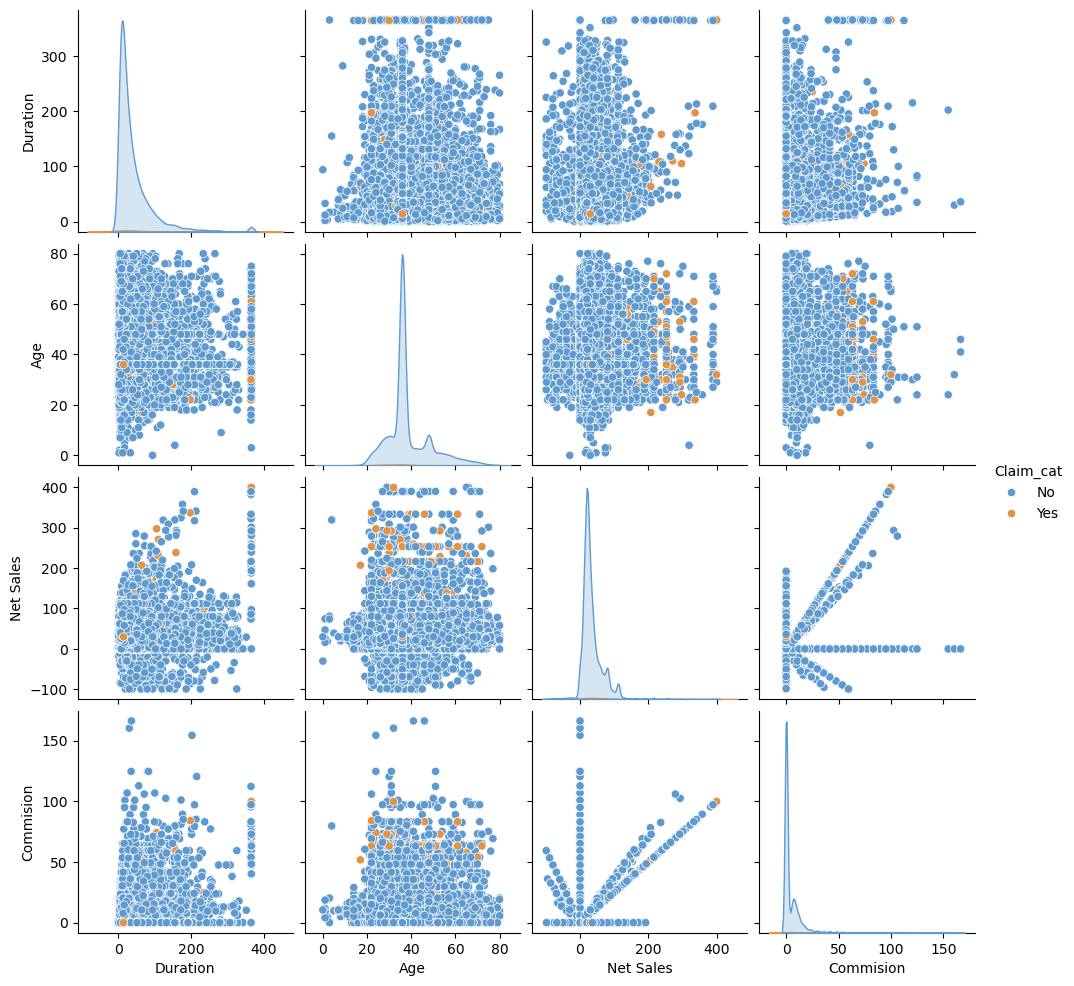

In [142]:
# Lihat hubungan tiap data numerikal
numerical_cols = ['Duration', 'Age', 'Net Sales', 'Commision']
df_dupe['Claim_cat'] = df_dupe['Claim'].map({1:'Yes', 0:'No'})
sns.pairplot(df_dupe, vars=numerical_cols, hue='Claim_cat', palette={'Yes':"#DF944A",'No':"#5E9ACF"})
plt.show()

**Duration vs Variabel Lain**

- **Duration vs Age:** Data tersebar cukup merata, tapi sebagian besar transaksi berada di durasi rendah (0–200). Tidak ada tren kuat antara umur dan durasi.

- **Duration vs Net Sales:** Ada pola outlier: beberapa transaksi durasi rendah tapi penjualan tinggi. Secara umum, klaim “Yes” muncul lebih sering pada durasi rendah–sedang dengan variasi net sales.

- **Duration vs Commission:** Mayoritas data berkonsentrasi di durasi rendah dan komisi rendah, tapi klaim “Yes” muncul juga di area ini.

**Age vs Variabel Lain**

- **Age vs Net Sales:** Penjualan tinggi cenderung muncul pada usia menengah (20–60), tapi ada outlier penjualan tinggi di usia rendah. Klaim “Yes” menyebar di seluruh rentang umur, tidak ada pola kuat.

- **Age vs Commission:** Komisi tersebar merata di seluruh usia, klaim “Yes” juga menyebar. Tidak ada korelasi jelas antara umur dan komisi.

**Net Sales vs Variabel Lain**

- **Net Sales vs Commission:**  Ada pola diagonal dari (0,0) ke atas, hal ini karena komisi sering dihitung proporsional dari net sales. Jadi semakin tinggi penjualan, komisi juga meningkat. Klaim “Yes” muncul di area net sales rendah–sedang, tapi jarang di net sales tinggi.


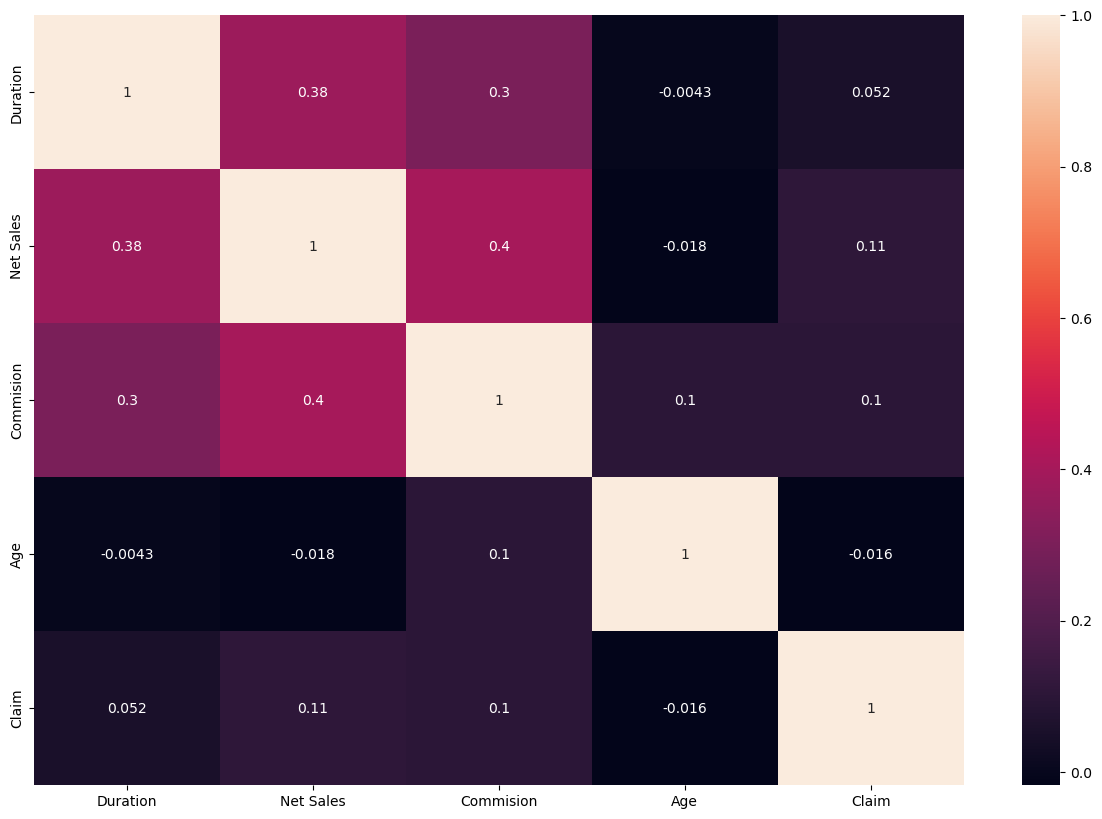

In [143]:
#Correlation Plot

numeric_cols = df_dupe.select_dtypes(include='number')
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_cols.corr(), annot=True, ax=ax)
plt.show()

Berdasarkan Heatmap Correlation Plot, terlihat bahwa data numerikal memiliki **hubungan yang cukup rundah**. Age dan Claim tidak dipengaruhi oleh nilai numerikal lainnya.

In [144]:
df_dupe = df_dupe.drop(columns=['Claim_cat'])

In [145]:
# Analisis Data Kategorikal
df_dupe.describe(include='object') 

,Agency,Agency Type,Distribution Channel,Product Name,Destination
count,32807,32807,32807,32807,32807
unique,15,2,2,23,132
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,20941,22720,32216,11001,7280


In [146]:
for i in df.drop(columns=['Duration','Net Sales','Commision','Age', 'Claim']).columns:
    analysis_df = df_dupe.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(analysis_df.sort_values(by=[1.0], ascending=False))

Claim,0,1
Agency,,
C2B,0.930222,0.069778
KML,0.978070,0.021930
CSR,0.983607,0.016393
CBH,0.984615,0.015385
CCR,0.988636,0.011364
SSI,0.992764,0.007236
TST,0.993651,0.006349
EPX,0.993744,0.006256
JZI,0.994736,0.005264


Claim,0,1
Agency Type,,
Airlines,0.965500,0.034500
Travel Agency,0.993794,0.006206


Claim,0,1
Distribution Channel,,
Online,0.985038,0.014962
Offline,0.988156,0.011844


Claim,0,1
Product Name,,
Annual Silver Plan,0.844156,0.155844
Annual Gold Plan,0.872340,0.127660
Silver Plan,0.927112,0.072888
Bronze Plan,0.939197,0.060803
Gold Plan,0.946667,0.053333
Premier Plan,0.982609,0.017391
Comprehensive Plan,0.985366,0.014634
2 way Comprehensive Plan,0.988391,0.011609
Value Plan,0.991790,0.008210


Claim,0,1
Destination,,
COSTA RICA,0.750000,0.250000
SINGAPORE,0.954808,0.045192
ICELAND,0.956522,0.043478
ISRAEL,0.958333,0.041667
CZECH REPUBLIC,0.968750,0.031250
...,...,...
UZBEKISTAN,1.000000,NaN
VANUATU,1.000000,NaN
VENEZUELA,1.000000,NaN


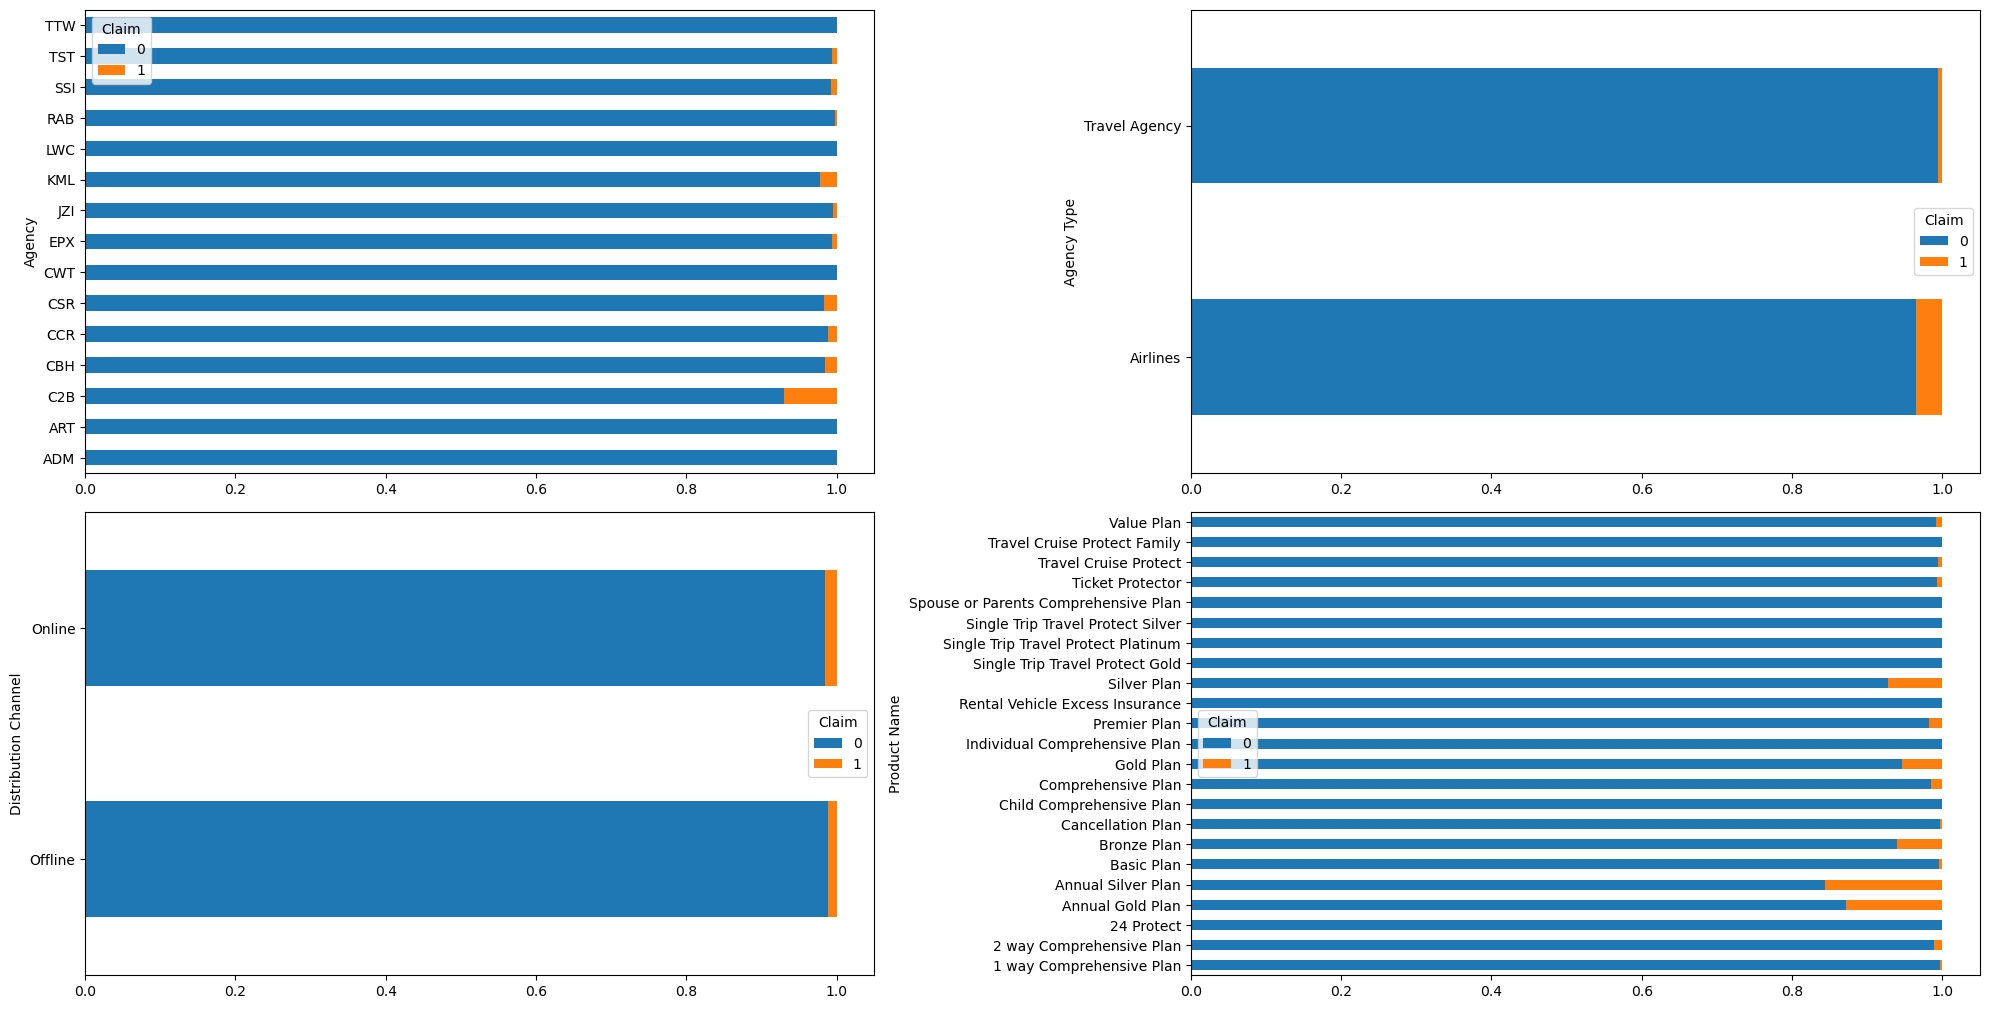

In [147]:

count = 0
fig = plt.figure(figsize=(20,20))

for i in df_dupe.drop(columns=['Duration','Age','Net Sales','Commision', 'Destination', 'Claim']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df_dupe[i],df_dupe['Claim'], normalize=0).plot(kind='barh',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

**Agency**
- Hampir semua agen memiliki dominasi No Claim, artinya sebagian besar transaksi tidak menghasilkan klaim.
- Beberapa agen seperti C2B menunjukkan proporsi Yes Claim yang relatif lebih besar dibanding agen lain.
- Ada indikasi bahwa produk atau layanan di agen tertentu lebih rentan klaim, atau jenis pelanggan berbeda.

**Agensi Type**
- Kedua tipe didominasi klaim “No”.
- Airlines menunjukkan proporsi klaim “Yes” sedikit lebih tinggi daripada Travel Agency

**Distribution Channel**
- Kedua kanal hampir sepenuhnya berwarna biru (No), tapi Offline memiliki klaim “Yes” sedikit lebih besar dibanding Online.
- Pelanggan offline sedikit lebih mungkin mengajukan klaim dibanding online.

**Product Name**
- Produk tertentu memiliki proporsi klaim “Yes” lebih tinggi.
- **Annual Travel Protect Gold** dan **Annual Gold Plan** terlihat lebih banyak klaim dibanding produk lain.
- Annual plan menanggung perjalanan sepanjang tahun, sehingga kemungkinan terjadi klaim juga lebih tinggi.
- Produk Gold biasanya lebih mahal dan menawarkan manfaat lebih banyak, yang bisa mendorong nasabah untuk mengajukan klaim.


<Figure size 1200x4000 with 0 Axes>

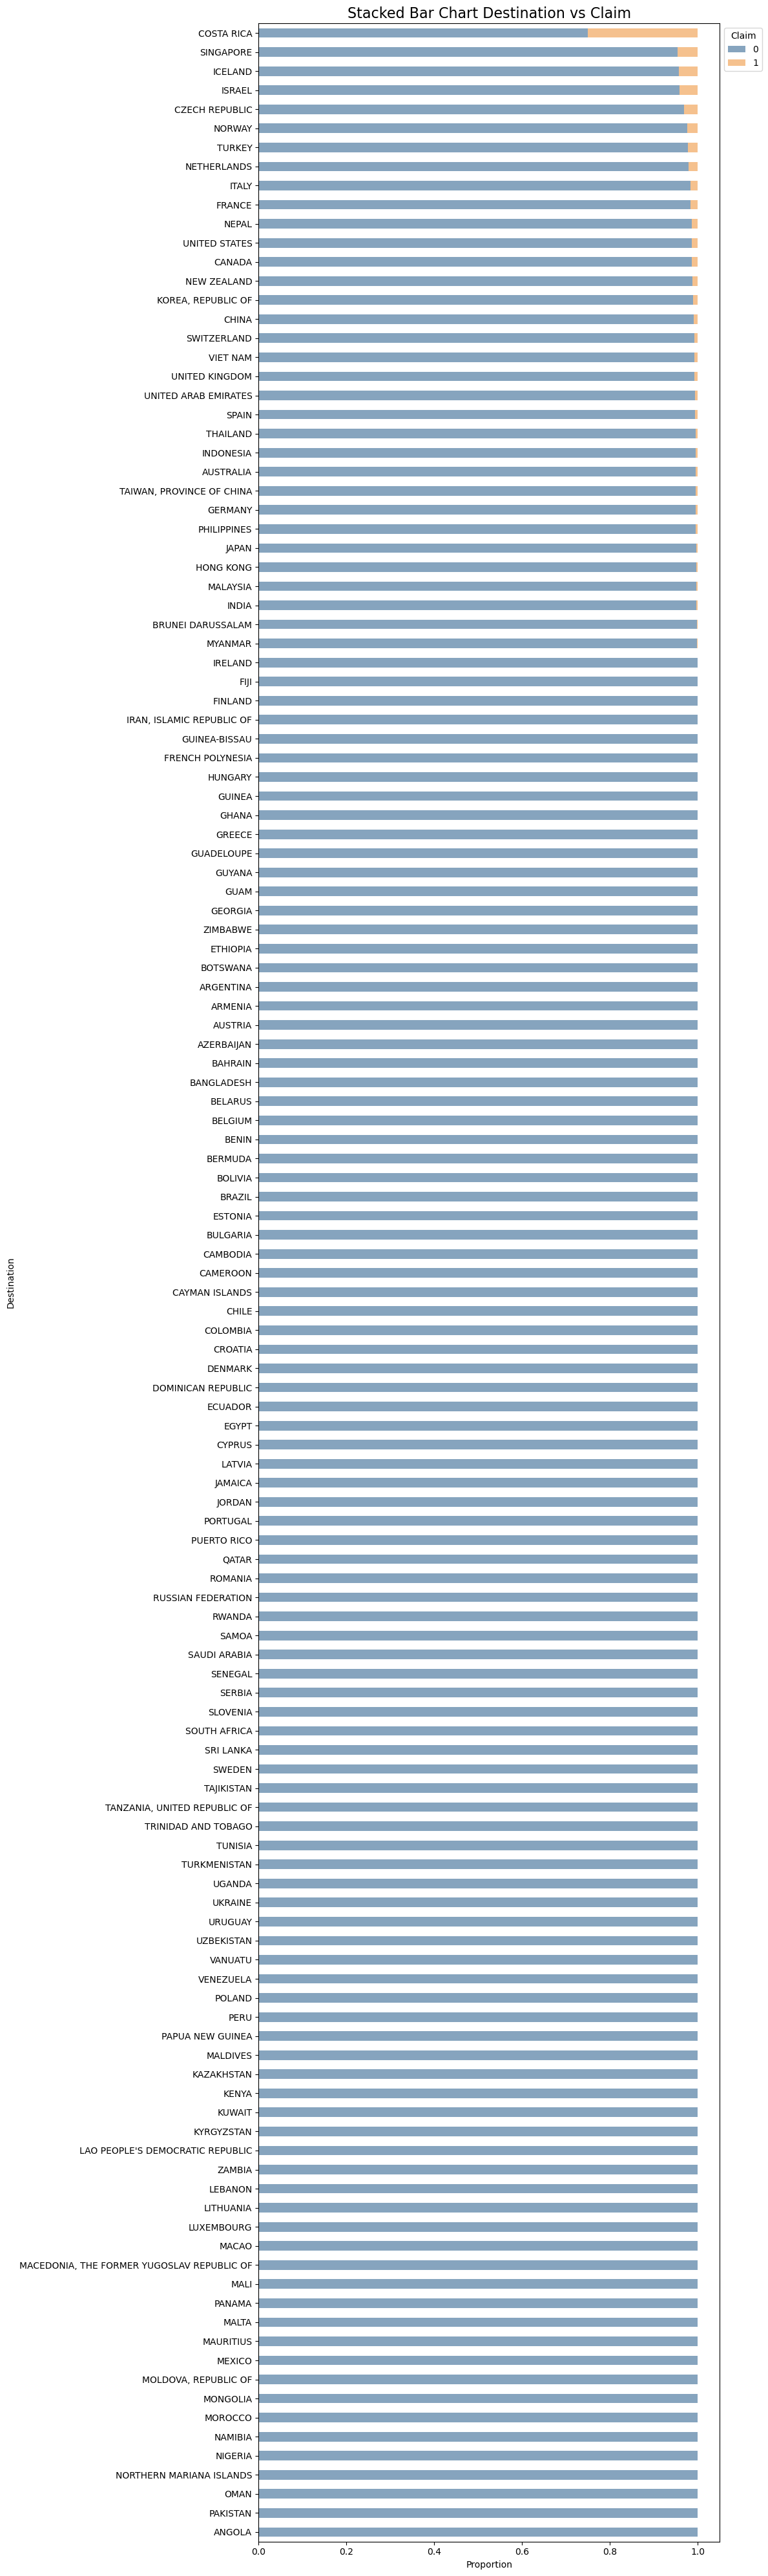

In [148]:
# Hitung crosstab
dest_claim = pd.crosstab(df_dupe['Destination'], df_dupe['Claim'], normalize=0)

# Urut dari Claim terbanyak
dest_claim = dest_claim.sort_values(by=1, ascending=True)

# Plot horizontal stacked bar
plt.figure(figsize=(12,40))  # tinggi besar supaya semua bar kelihatan
dest_claim.plot(
    kind='barh',
    stacked=True,
    color=['#86A4BE', '#F5C18E'],
    figsize=(12,40)
)

plt.title('Stacked Bar Chart Destination vs Claim', fontsize=16)
plt.xlabel('Proportion')
plt.ylabel('Destination')

# Pindahkan legend ke luar plot (kanan atas)
plt.legend(title='Claim', loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

**Destination**

Berdasarkan destination, ternyata klaim paling banyak berasal dari **Costa Rica, Singapore, dan Iceland**, yang dipengaruhi oleh jenis perjalanan dan aktivitas.
- **Costa Rica** terkenal untuk wisata alam, hutan hujan, dan adventure (zipline, rafting, hiking) → risiko cedera atau insiden lebih tinggi → klaim lebih banyak.
- **Iceland** juga destinasi adventure (glacier hiking, volcanic tours, geothermal activity) → risiko kecelakaan atau kebutuhan evakuasi meningkat.
- **Singapore** mungkin lebih ke perjalanan bisnis atau wisata urban, tapi bisa terkait klaim medis kecil atau kehilangan barang karena banyak wisatawan dan aktivitas padat.


# IV. Feature Engineering

## A. Encoding

Kolom yang hanya memiliki dua kategori unik, seperti Agency Type dan Distribution Channel, diubah menggunakan One-Hot Encoding, sedangkan kolom yang memiliki banyak kategori nominal diubah menggunakan Binary Encoding.

In [149]:
df_dupe

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
32802,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,THAILAND,40.0,0.00,36,0
32803,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
32804,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
32805,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


-  Merubah fitur/kolom `Agency Type` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
-  Merubah fitur/kolom `Distribution Channel` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
- Merubah fitur/kolom `Product Name` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan jika menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik.
- Merubah fitur/kolom `Destination` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan jika menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik.

In [150]:
trans = ColumnTransformer([
    ('binary', ce.BinaryEncoder(), ['Agency','Product Name','Destination']),
    ('onehot', OneHotEncoder(drop='first'), ['Agency Type','Distribution Channel','Claim'])
], remainder='passthrough')

In [151]:
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel',
                                  'Claim'])])

In [152]:
df_encoded = trans.fit_transform(df_dupe)
df_encoded = pd.DataFrame(df_encoded)
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,10.0,0.00,33.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,20.0,112.0,0.00,59.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,40.0,0.00,36.0
32803,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0,30.0,0.00,36.0
32804,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,64.0,30.0,10.50,50.0
32805,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,51.0,36.0,0.00,36.0


In [153]:
trans.transformers_[0][1].get_feature_names_out()

array(['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0',
       'Product Name_1', 'Product Name_2', 'Product Name_3',
       'Product Name_4', 'Destination_0', 'Destination_1',
       'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
       'Destination_6', 'Destination_7'], dtype=object)

In [154]:
trans.transformers_[1][1].get_feature_names_out()

array(['Agency Type_Travel Agency', 'Distribution Channel_Online',
       'Claim_1'], dtype=object)

In [155]:
feature_names = list(trans.transformers_[0][1].get_feature_names_out()) + list(trans.transformers_[1][1].get_feature_names_out()) + ['Duration', 'Net Sales', 'Commision', 'Age',]
df_encoded.columns = feature_names
df_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Agency Type_Travel Agency,Distribution Channel_Online,Claim_1,Duration,Net Sales,Commision,Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,10.0,0.00,33.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,20.0,112.0,0.00,59.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,40.0,0.00,36.0
32803,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0,30.0,0.00,36.0
32804,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,64.0,30.0,10.50,50.0
32805,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,51.0,36.0,0.00,36.0


In [156]:
df_encoded.rename({'Claim_1':'Claim'}, axis=1, inplace = True)
df_encoded.rename({'Commision (in value)':'Commision'}, axis=1, inplace = True)
df_encoded.rename({'Agency Type_Travel Agency':'Agency Type'}, axis=1, inplace = True)
df_encoded.rename({'Distribution Channel_Online':'Distribution Channel'}, axis=1, inplace = True)
df_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision,Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,10.0,0.00,33.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,20.0,112.0,0.00,59.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,40.0,0.00,36.0
32803,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14.0,30.0,0.00,36.0
32804,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,64.0,30.0,10.50,50.0
32805,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,51.0,36.0,0.00,36.0


## B. Split Data Train & Test

Langkah penting selanjutnya adalah membagi dataset menjadi subset yang berbeda untuk memastikan evaluasi performa model yang objektif dan mencegah overfitting. Dataset dibagi menjadi dua yaitu:
1. **Training Set** – digunakan untuk melatih model dan menyesuaikan parameter internal.
2. **Test Set** – digunakan untuk mengevaluasi performa akhir model secara independen, merepresentasikan data baru yang belum pernah dilihat model sebelumnya.

In [157]:
# Menghilangkan kolom Claim agar tidak ada data leakage
y = df_encoded['Claim']
x = df_encoded.drop(columns = 'Claim')

In [158]:
# Split dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

- 80% data dipakai untuk training

- 20% data dipakai untuk testing

- stratify=y menjaga proporsi kelas tetap sama di train dan test

- random_state=2021 memberi “seed” untuk generator angka acak yang digunakan untuk membagi data.

In [159]:
print('total data:', len(df_encoded))     
print('data latih:', len(x_train))
print('hasil latih:', len(y_train))    
print('data uji:', len(x_test))    
print('hasil uji:', len(y_test))         

total data: 32807
data latih: 26245
hasil latih: 26245
data uji: 6562
hasil uji: 6562


## D. Feature Selection

Feature Selection merupakan proses memilih subset fitur (variabel) yang paling relevan untuk membangun model prediksi. Tujuannya adalah:

- **Meningkatkan performa model** → dengan mengurangi fitur yang tidak relevan atau noisy, model dapat lebih fokus pada informasi penting.

- **Mengurangi overfitting** → semakin sedikit fitur yang tidak perlu, semakin kecil risiko model belajar “noise” dari data training.

- **Mempercepat training dan interpretasi** → model dengan lebih sedikit fitur lebih cepat dilatih dan lebih mudah dianalisis.

In [160]:
# Menggunakan metode filter berbasis skor statistik (ANOVA F-test)
selector = SelectPercentile(score_func=f_classif, percentile=80)
selector.fit(x_train, y_train)

SelectPercentile(percentile=80)

**SelectPercentile**

- Memilih persentase tertentu dari fitur yang paling “relevan” dengan target.

- Percentile=80 → memilih 80% fitur terbaik berdasarkan skor.

**score_func=f_classif**

- f_classif = ANOVA F-test untuk klasifikasi.

- Mengukur seberapa kuat hubungan setiap fitur numerik dengan target kelas.

- Semakin tinggi skor F, semakin relevan fiturnya.

**fit(x_train, y_train)**

- Menghitung skor F untuk semua fitur di x_train terhadap y_train.

- Setelah fit, selector mengetahui fitur mana yang termasuk 80% terbaik.

In [161]:
# Melihat skor relevansi tiap fitur
feature_scores = pd.DataFrame({
    'Feature': x_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

feature_scores

,Feature,Score
2,Agency_2,559.457658
17,Agency Type,327.453008
3,Agency_3,316.696868
20,Net Sales,308.486167
8,Product Name_4,287.785187
21,Commision,268.558699
6,Product Name_2,179.729700
15,Destination_6,116.983525
16,Destination_7,106.985482
13,Destination_4,78.503627


In [162]:
# menampilkan fitur yang terpilih
df_features = pd.DataFrame({
    'Features': x_train.columns,
    'Indicator': selector.get_support()
})
df_features[df_features['Indicator'] == True]

,Features,Indicator
1,Agency_1,True
2,Agency_2,True
3,Agency_3,True
4,Product Name_0,True
5,Product Name_1,True
6,Product Name_2,True
7,Product Name_3,True
8,Product Name_4,True
12,Destination_3,True
13,Destination_4,True


In [163]:
# Ambil nama kolom yang dipilih
feature_true = x_train.columns[selector.get_support()].tolist()
print(feature_true)

['Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0', 'Product Name_1', 'Product Name_2', 'Product Name_3', 'Product Name_4', 'Destination_3', 'Destination_4', 'Destination_5', 'Destination_6', 'Destination_7', 'Agency Type', 'Duration', 'Net Sales', 'Commision', 'Age']


Dari 23 fitur awal, proses SelectPercentile memilih 18 fitur yang memiliki pengaruh paling signifikan terhadap target, sementara 5 fitur lainnya diabaikan karena skornya lebih rendah dibandingkan threshold percentile yang ditentukan. Fitur tersebut diantaranya `Agency_1`, `Agency_2`, `Agency_3`, `Product Name_0`, `Product Name_2`, `Product Name_3`, `Product Name_4`, `Destination_2`, `Destination_3`, `Destination_4`, `Destination_5`, `Destination_6`, `Destination_7`, `Agency Type`, `Duration`, `Net Sales`, `Commision`, `Age`


In [164]:
# pakai fitur pilihan pada data
x_train_selected = x_train[feature_true]
x_test_selected = x_test[feature_true]

- Hanya fitur terpilih yang dipakai untuk training/testing model.

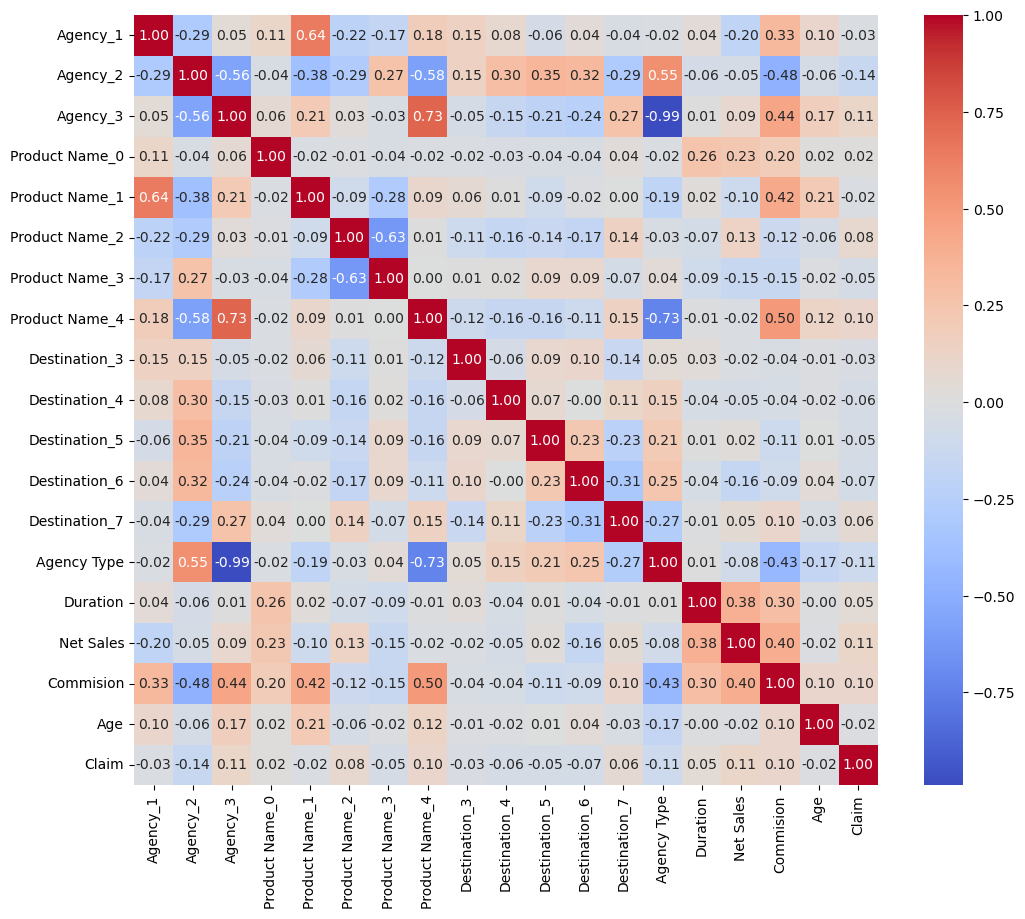

In [165]:
# Gunakan hanya fitur yang sudah dipilih
feature_corr = df_encoded[feature_true + ['Claim']]

# Hitung korelasi
corr_matrix = feature_corr.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# V. Modeling & Evaluation

Proses pemodelan dilakukan menggunakan beberapa algoritma, yaitu Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost, dan LightGBM. Mengingat data yang tidak seimbang, setiap model dievaluasi melalui Pipeline dan Stratified K-Fold Cross Validation.

Untuk evaluasi performa, digunakan metrik ROC-AUC karena dianggap memberikan rata-rata performa yang lebih representatif dibandingkan Balanced Accuracy.

Performa tiap model akan dianalisis dengan default hyperparameter untuk menentukan model yang paling baik dan stabil. Model terbaik dari evaluasi ini nantinya akan dipilih untuk tahap klasifikasi berikutnya, termasuk proses Hyperparameter Tuning.

In [166]:
# Coba semua model klasifikasi
logreg = LogisticRegression(max_iter=4000, random_state=2023)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2023)
rf = RandomForestClassifier(random_state=2023)
xgb = XGBClassifier(random_state=2023)
lgbm = LGBMClassifier(random_state=2023)

smote = SMOTE(random_state=2023)
scaler = RobustScaler()

logreg_penalized = LogisticRegression(class_weight = 'balanced', random_state=2023)

## A. Model Fitting Tanpa Oversampling

### 1. Model Test

In [167]:
# Model Fitting tanpa oversampling
models = [logreg, knn, dt, rf, xgb, lgbm]

rocauc_mean_no_sampling = []
rocauc_std_no_sampling = []

for i in models:
    pipe_model_no_sampling = Pipeline([
        ('scaler', RobustScaler()),     
        ('algorithm', i)
    ])
    
    skfold = StratifiedKFold(n_splits=5)
    
    model_no_sampling = cross_val_score(
        pipe_model_no_sampling,
        x_train_selected, 
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    rocauc_mean_no_sampling.append(model_no_sampling.mean())
    rocauc_std_no_sampling.append(model_no_sampling.std())

pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Mean': rocauc_mean_no_sampling,
    'Std': rocauc_std_no_sampling,
}).set_index('model').sort_values(by='Mean', ascending=False)


[LightGBM] [Info] Number of positive: 313, number of negative: 20683
[LightGBM] [Info] Number of positive: 313, number of negative: 20683
[LightGBM] [Info] Number of positive: 313, number of negative: 20683
[LightGBM] [Info] Number of positive: 312, number of negative: 20684
[LightGBM] [Info] Number of positive: 313, number of negative: 20683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 20996, number of used features: 18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008656 seconds.
You 

/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with f

,Mean,Std
model,,
Logistic Regression,0.831049,0.013190
LightGBM,0.803057,0.025494
XGBoost,0.780412,0.020934
Random Forest,0.695326,0.029404
KNN,0.591010,0.013185
Decision Tree,0.527281,0.008431


Mean: nilai rata-rata ROC-AUC dari 5-fold cross-validation pada data training. Semakin tinggi, semakin baik model membedakan kelas 0 dan 1.
- Logistic Regression paling kuat dan stabil di dataset tanpa oversampling.
- Model berbasis tree seperti Random Forest dan Decision Tree kurang efektif untuk data ini, mungkin karena imbalance.
- Model boosting (LightGBM, XGBoost) cukup baik tapi masih di bawah Logistic Regression.

### 2. Test Set Evaluation

In [168]:
models = [logreg, knn, dt, rf, xgb, lgbm]
rocauc_test_nosampling_noselect1 = []
rocauc_train_nosampling_noselect1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train_selected,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict_proba(x_test_selected)[:, 1]
    y_pred_train = estimator.predict_proba(x_train_selected)[:, 1]
    rocauc_test_nosampling_noselect1.append(roc_auc_score(y_test, y_pred_test))
    rocauc_train_nosampling_noselect1.append(roc_auc_score(y_train, y_pred_train))

pd.DataFrame({
    'model': ['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost','LightGBM'],
    'Train ROC-AUC': rocauc_train_nosampling_noselect1,
    'Validation ROC-AUC': rocauc_mean_no_sampling,
    'Test ROC-AUC': rocauc_test_nosampling_noselect1,
}).set_index('model').sort_values(by='Validation ROC-AUC', ascending=False)

[LightGBM] [Info] Number of positive: 391, number of negative: 25854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 26245, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.014898 -> initscore=-4.191513
[LightGBM] [Info] Start training from score -4.191513


,Train ROC-AUC,Validation ROC-AUC,Test ROC-AUC
model,,,
Logistic Regression,0.838921,0.831049,0.787044
LightGBM,0.987272,0.803057,0.775869
XGBoost,0.986118,0.780412,0.751936
Random Forest,0.999882,0.695326,0.628324
KNN,0.976441,0.591010,0.559181
Decision Tree,0.999886,0.527281,0.526178


**Logistic Regression**

- Stabil & tidak overfit → gap kecil antara train, validation, dan test.

- Cocok untuk industri asuransi karena mudah dijelaskan ke tim klaim.

- Performanya di test paling tinggi (0.787) → juara di generalisasi.

**LightGBM**

- Train: 0.987 → sangat tinggi → ada overfitting.

- Val: 0.803 | Test: 0.776 → meski overfit, tetap cukup kuat.

**XGBoost**

- Mirip LightGBM tapi sedikit lebih rendah di test (0.752).

- Overfit juga, tapi tetap usable.

**Random Forest**

- Train hampir 1.0, tapi val drop ke 0.695 dan test 0.628 → sangat iverfit

- Tidak direkomendasikan dalam kondisi ini.

**KNN**

- Train cukup tinggi (0.976) tapi val rendah (0.591) → overfit & kurang cocok untuk data ini.

**Decision Tree**

- Train nyaris sempurna (0.9999) tapi val/test nyaris acak (0.52) → sangat overfit.

### 3. Final Test Evaluation

In [169]:
models = [logreg, knn, dt, rf, xgb, lgbm]
score_roc_auc = []

for model, name in zip(models, ['Logistic Regression','KNN','Decision Tree',
                                'Random Forest','XGBoost','LightGBM']):
    # Pipeline dengan scaler
    estimator = Pipeline([
        ('scaler', RobustScaler()),
        ('model', model)
    ])
    
    # Fit model
    estimator.fit(x_train_selected, y_train)
    
    # Prediksi
    y_pred = estimator.predict(x_test_selected)
    y_pred_proba = estimator.predict_proba(x_test_selected)[:,1]
    
    # Simpan ROC-AUC
    score_roc_auc.append(roc_auc_score(y_test, y_pred_proba))
    
    print(name, '\n', classification_report(y_test, y_pred))

# Buat DataFrame
pd.DataFrame({
    'model': ['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost','LightGBM'],
    'roc_auc score': score_roc_auc
}).set_index('model').sort_values(by='roc_auc score', ascending=False)


Logistic Regression 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      6464
         1.0       0.00      0.00      0.00        98

    accuracy                           0.99      6562
   macro avg       0.49      0.50      0.50      6562
weighted avg       0.97      0.99      0.98      6562

KNN 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      6464
         1.0       0.14      0.01      0.02        98

    accuracy                           0.98      6562
   macro avg       0.56      0.50      0.51      6562
weighted avg       0.97      0.98      0.98      6562

Decision Tree 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      6464
         1.0       0.06      0.07      0.06        98

    accuracy                           0.97      6562
   macro avg       0.52      0.53      0.52      6562
weighted avg       0.97      0

,roc_auc score
model,
Logistic Regression,0.787044
LightGBM,0.775869
XGBoost,0.751936
Random Forest,0.628324
KNN,0.559181
Decision Tree,0.526178


**Data imbalance jelas terlihat**

- Label 1 (minoritas) hanya ada 98, sedangkan label 0 ada 6464.
- Akibatnya, model cenderung memprediksi semua sebagai 0 → recall & f1 untuk label 1 sangat rendah.
- Accuracy tinggi (0.98–0.99) tapi ini menyesatkan karena sebagian besar prediksi benar hanya karena label 0 dominan.

**Precision, recall, f1-score untuk label 1 sangat rendah**

- Logistic Regression: recall = 0 → tidak menangkap satu pun kasus positif.
- KNN: recall = 0.01 → hampir tidak menangkap kasus positif.
- Decision Tree: recall = 0.07 → sedikit lebih baik tapi masih sangat buruk.

**Macro average vs weighted average**

- Macro avg (~0.50) menunjukkan performa rata-rata antar kelas yang seimbang → memperlihatkan kelemahan pada kelas minoritas.
- Weighted avg (~0.98) masih tinggi karena mendominasi kelas mayoritas.

Dari hasil yang ditunjukkan, terlihat bahwa model tanpa oversampling gagal mendeteksi kelas minoritas (1) akibat distribusi data yang sangat tidak seimbang. Akibatnya, recall dan f1-score untuk kelas minoritas hampir nol, meskipun akurasi keseluruhan terlihat tinggi. Jika tujuan analisis adalah untuk mendeteksi klaim atau kejadian minoritas, pendekatan ini kurang efektif. Oleh karena itu, diperlukan penggunaan teknik balancing seperti SMOTE atau metode oversampling lainnya, atau penyesuaian threshold prediksi, agar model mampu menangkap kasus-kasus minoritas dengan lebih baik.

## B. Model Fitting Dengan Oversampling

### 1. Model Test

In [170]:
# Model Fitting dengan Oversampling 
models = [logreg, knn, dt, rf, xgb, lgbm]

rocauc_mean_sampling_select1 = []
rocauc_std_sampling_select1 = []

for i in models:
    pipe_model_sampling = ImbPipeline([
        ('scaler', RobustScaler()),     
        ('smote', SMOTE(random_state=42)),
        ('algorithm', i)
    ])
    
    skfold = StratifiedKFold(n_splits=5)
    
    model_sampling_select = cross_val_score(
        pipe_model_sampling,
        x_train_selected, 
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs=-1
    )
    
    rocauc_mean_sampling_select1.append(model_sampling_select.mean())
    rocauc_std_sampling_select1.append(model_sampling_select.std())

pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Mean': rocauc_mean_sampling_select1,
    'Std': rocauc_std_sampling_select1,
}).set_index('model').sort_values(by='Mean', ascending=False)

[LightGBM] [Info] Number of positive: 20683, number of negative: 20683
[LightGBM] [Info] Number of positive: 20683, number of negative: 20683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4157
[LightGBM] [Info] Number of data points in the train set: 41366, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4138
[LightGBM] [Info] Number of data points in the train set: 41366, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with f

,Mean,Std
model,,
Logistic Regression,0.830473,0.009903
LightGBM,0.798182,0.019641
XGBoost,0.781585,0.016647
Random Forest,0.744538,0.009925
KNN,0.683830,0.007691
Decision Tree,0.538479,0.015856


**Logistic Regression**

- Mean ROC-AUC: 0.830 → paling tinggi dari semua model.

- Std: 0.0099 → sangat stabil antar fold → model konsisten.

**LightGBM**

- Mean: 0.798 → sedikit di bawah LogReg.

- Std: 0.0196 → agak lebih variatif, artinya performa lebih sensitif terhadap data split.

**XGBoost**

- Mean: 0.781 → mirip LightGBM tapi sedikit lebih rendah.

- Std: 0.0166 → variasi sedang.

**Random Forest**

- Mean: 0.744 → lumayan jauh di bawah LogReg.

**KNN**

- Mean: 0.684 → performa jauh di bawah top 3.

**Decision Tree**

- Mean: 0.538 → nyaris acak → tidak direkomendasikan.

### 2. Test Set Evaluation

In [171]:
# Data Training with oversampling
models = [logreg, knn, dt, rf, xgb, lgbm]
rocauc_test_sampling_select1 = []
rocauc_train_sampling_select1 = []

def y_pred_func(model):
    estimator = ImbPipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])

    estimator.fit(x_train_selected, y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict_proba(x_test_selected)[:, 1]
    y_pred_train = estimator.predict_proba(x_train_selected)[:, 1]
    rocauc_test_sampling_select1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_sampling_select1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Train Set': rocauc_train_sampling_select1,
    'Validation Set': rocauc_mean_sampling_select1,
    'Test Set': rocauc_test_sampling_select1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

[LightGBM] [Info] Number of positive: 25854, number of negative: 25854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 51708, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.841411,0.830473,0.783563
LightGBM,0.890861,0.798182,0.774349
XGBoost,0.947573,0.781585,0.775985
Random Forest,0.999863,0.744538,0.687356
KNN,0.995837,0.683830,0.612041
Decision Tree,0.999886,0.538479,0.527769


**Logistic Regression:** Stabil dari train ke test (0.841 → 0.784). Performa menurun sedikit, tapi tetap cukup konsisten, model tidak overfit.

**LightGBM:** Cukup baik di train (0.891) tapi turun lebih nyata di validation dan test (0.798 → 0.774). Masih relatif stabil dibanding model kompleks lainnya.

**XGBoost:** Sangat tinggi di train (0.948) tapi turun signifikan di validation (0.782) dan test (0.776), menandakan overfitting sedang.

**Random Forest:** Hampir sempurna di train (0.9999) tapi drop tajam di validation (0.745) dan test (0.687), jelas mengalami overfitting berat.

**KNN:** Mirip Random Forest, tinggi di train (0.996) tapi rendah di test (0.612), juga menunjukkan overfitting.

**Decision Tree:** Sangat tinggi di train (0.9999) tapi sangat rendah di validation dan test (0.538 → 0.528), overfitting ekstrem.

### 3. Final Test Evaluation

In [172]:
models = [logreg, knn, dt, rf, xgb, lgbm]
score_roc_auc_smote = []

def y_pred_func_smote(i):
    estimator = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', i)
    ])
    estimator.fit(x_train_selected, y_train)
    return estimator, estimator.predict(x_test_selected), x_test_selected

for i, j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator, y_pred, x_test = y_pred_func_smote(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc_smote.append(roc_auc_score(y_test, y_predict_proba))
    print(j, '\n', classification_report(y_test, y_pred))

pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
    'roc_auc score': score_roc_auc_smote
}).set_index('model').sort_values(by='roc_auc score', ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

         0.0       0.99      0.80      0.89      6464
         1.0       0.05      0.67      0.09        98

    accuracy                           0.80      6562
   macro avg       0.52      0.74      0.49      6562
weighted avg       0.98      0.80      0.88      6562

KNN 
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      6464
         1.0       0.03      0.26      0.05        98

    accuracy                           0.87      6562
   macro avg       0.51      0.56      0.49      6562
weighted avg       0.97      0.87      0.91      6562

Decision Tree 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      6464
         1.0       0.04      0.08      0.06        98

    accuracy                           0.96      6562
   macro avg       0.52      0.53      0.52      6562
weighted avg       0.97      0

,roc_auc score
model,
LightGBM,0.789546
Logistic Regression,0.784280
XGBoost,0.778676
Random Forest,0.678630
KNN,0.581323
Decision Tree,0.527311


**Recall kelas 1 (positif) naik drastis di Logistic Regression**

Sebelum SMOTE: 0.00 → Sesudah SMOTE: 0.67, artinya model sekarang jauh lebih sensitif menangkap klaim positif.

**Trade-off**
- Akurasi turun (LogReg dari ~0.99 → 0.80) karena model mulai “berani” memprediksi positif.
- Precision kelas 1 turun (0.05) → banyak false positive (klaim negatif ikut diprediksi positif).

**Model lain (KNN, Tree, RF, XGB, LGBM)**
- Recall kelas 1 naik sedikit, tapi tetap rendah (0.05–0.26).
- Logistic Regression paling agresif dalam memprediksi positif → recall jauh lebih tinggi.

Berdasarkan evaluasi ini diperoleh bahwa model bekerja dengan baik ketika ditambah oversampling dan menggunakan feature yang telah diseleksi.

# VI. Best Model Performance & Evaluation

## A. Best Model Selection

In [173]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

In [174]:
# Best Model
best_rocauc = 0
final_model = None
final_y_pred = None
final_y_proba = None

for name, model in zip(model_names, models):
    pipe = ImbPipeline([
        ('scaler', scaler),
        ('smote', smote),
        ('model', model)
    ])
    pipe.fit(x_train_selected, y_train)
    
    y_proba_val = cross_val_predict(pipe, x_train_selected, y_train, cv=5, method='predict_proba')[:, 1]
    val_score = roc_auc_score(y_train, y_proba_val)
    
    if val_score > best_rocauc:
    
        best_rocauc = val_score
        final_model = pipe
        final_y_pred = pipe.predict(x_test_selected)
        final_y_proba = pipe.predict_proba(x_test_selected)[:, 1]

print("------------------------------------")
print("Model terbaik:", final_model.named_steps['model'])
print("ROC AUC validation terbaik:", best_rocauc)
print("ROC AUC test set:", roc_auc_score(y_test, final_y_proba))


[LightGBM] [Info] Number of positive: 25854, number of negative: 25854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4166
[LightGBM] [Info] Number of data points in the train set: 51708, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 20683, number of negative: 20683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4137
[LightGBM] [Info] Number of data points in the train set: 41366, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

Karena Logistic Regression dan LightGBM menunjukkan performa yang hampir sama, dilakukan pemilihan model terbaik berdasarkan ROC-AUC pada data training/validation dengan menggunakan evaluasi cross-validation. Hasil pemilihan model menunjukkan bahwa model terbaik adalah Logistic Regression dengan parameter `max_iter=4000` dan `random_state=2023.` Model ini menghasilkan ROC-AUC validation sebesar 0.8287 dan ROC-AUC pada test set sebesar 0.7836, menandakan performa yang stabil dan kemampuan generalisasi yang baik ke data baru.

Dataset yang digunakan cukup besar dan diproses menggunakan pipeline dengan SMOTE, sehingga jumlah sampel meningkat akibat oversampling. Selain itu, beberapa fitur telah diskalakan, sehingga proses optimisasi membutuhkan lebih banyak langkah untuk menyeimbangkan bobot semua fitur. Dengan menetapkan `max_iter=4000,` algoritma diberikan waktu yang cukup untuk konvergen secara stabil, memastikan koefisien model optimal dan menghasilkan ROC-AUC validasi yang lebih tinggi.

## B. Hyperparameter Tuning

Hyperparameter tuning diperlukan agar model optimal, stabil, dan mampu generalisasi dengan baik, terutama pada dataset kompleks atau tidak seimbang. Grid Search digunakan karena mencoba semua kombinasi hyperparameter untuk menemukan konfigurasi terbaik, mudah diintegrasikan dengan pipeline (scaler + SMOTE), dan menjamin hasil konsisten, meski membutuhkan waktu lebih lama. Dengan cara ini, model diharapkan lebih stabil dan tidak overfit.

### 1. Best Model Before Tuning

In [175]:
# Sebelum tuning
rocauc_test_sampling_select = []
rocauc_train_sampling_select = []

estimator = ImbPipeline([
    ('scaler', scaler),
    ('resample', smote),
    ('algorithm', logreg)
])

estimator.fit(x_train_selected, y_train)
y_pred_test = estimator.predict(x_test_selected)
y_pred_train = estimator.predict(x_train_selected)

pd.DataFrame({
    '':['Train Score', 'Test Score', 'Model Accuracy'],
    'Score': [roc_auc_score(y_train,y_pred_train), roc_auc_score(y_test,y_pred_test), 
                      estimator.score(x_train_selected,y_train)]
})

,,Score
0,Train Score,0.777328
1,Test Score,0.740819
2,Model Accuracy,0.801981


Hasil evaluasi model tanpa hyperparameter tunning menunjukkan bahwa ROC-AUC pada data training sebesar 0.7773, sedangkan pada data test sebesar 0.7408, menandakan model masih mampu mempertahankan performa pada data baru dengan cukup baik. Selain itu, akurasi model tercatat sebesar 0.8020, yang menunjukkan kemampuan model dalam mengklasifikasikan mayoritas sampel dengan benar. Secara keseluruhan, hasil ini mengindikasikan bahwa model cukup stabil dan memiliki kemampuan generalisasi yang memadai.

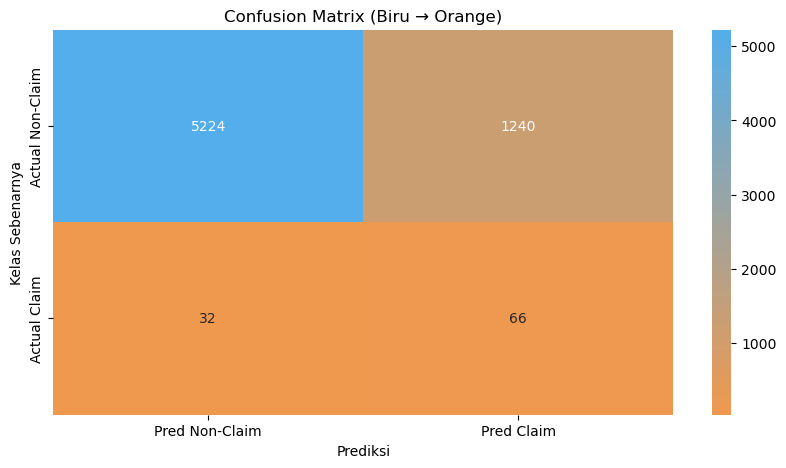

In [176]:
# Buat colormap biru → orange
colors = ["#ef994e", "#53aeeb"]
cmap = LinearSegmentedColormap.from_list("blue_orange", colors)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap=cmap, 
            xticklabels=["Pred Non-Claim", "Pred Claim"], 
            yticklabels=["Actual Non-Claim", "Actual Claim"])
plt.xlabel("Prediksi")
plt.ylabel("Kelas Sebenarnya")
plt.title("Confusion Matrix (Biru → Orange)")
plt.show()

**Interpretasi**

- 5224 (TN) → Kasus non-claim yang benar diprediksi non-claim
- 1240 (FP) → Kasus non-claim tapi model salah prediksi jadi claim
- 32 (FN) → Kasus claim tapi model salah prediksi jadi non-claim
- 66 (TP) → Kasus claim yang benar diprediksi claim

In [177]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test),
        roc_auc_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_test)
    ]
})

,,Score
0,Recall,0.673469
1,Precision,0.050536
2,ROC-AUC,0.740819
3,Accuracy,0.806157


- **Recall = 0.6735** → Dari semua kasus klaim sebenarnya, model berhasil mendeteksi sekitar 67%. Artinya model cukup sensitif terhadap klaim, meskipun ada sebagian klaim yang terlewat (FN).

- **Precision = 0.0505** → Dari semua prediksi klaim, hanya sekitar 5% yang benar-benar klaim. Ini rendah karena banyak False Positive (FP), wajar pada data klaim yang sangat tidak seimbang.

- **ROC-AUC = 0.7408** → Model mampu membedakan klaim dan non-claim dengan baik; nilai di atas 0.7 menunjukkan performa prediksi cukup memuaskan.

- **Accuracy = 0.8062** → Sekitar 80.6% prediksi model benar secara keseluruhan. Namun karena data imbalance tinggi, akurasi bisa menyesatkan (model bisa benar banyak di kelas non-claim).

In [178]:
print(estimator,'\n', classification_report(y_test,y_pred_test))

Pipeline(steps=[('scaler', RobustScaler()),
                ('resample', SMOTE(random_state=2023)),
                ('algorithm',
                 LogisticRegression(max_iter=4000, random_state=2023))]) 
               precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      6464
         1.0       0.05      0.67      0.09        98

    accuracy                           0.81      6562
   macro avg       0.52      0.74      0.49      6562
weighted avg       0.98      0.81      0.88      6562



**Precision, Recall, F1-score**

1. Kelas 0 (Non-claim)
- Precision = 0.99 → Dari semua prediksi non-claim, 99% benar.
- Recall = 0.81 → Dari semua non-claim sebenarnya, 81% terdeteksi benar.
- F1-score = 0.89 → Harmonik antara precision dan recall, performa baik.

2. Kelas 1 (Claim)
- Precision = 0.05 → Dari semua prediksi claim, hanya 5% benar (banyak FP).
- Recall = 0.67 → Dari semua claim sebenarnya, 67% berhasil dideteksi (TP cukup tinggi).
- F1-score = 0.09 → Karena precision sangat rendah, F1-score juga rendah.

**Accuracy**

- 0.81 → Sekitar 81% prediksi benar secara keseluruhan, tapi karena data imbalance tinggi (kelas claim sangat kecil), akurasi bisa menyesatkan.

**Macro & Weighted Average**

- Macro avg → Rata-rata tanpa memperhitungkan jumlah sampel tiap kelas, menunjukkan performa rata-rata antar kelas:
- Macro F1 = 0.49 → Cukup rendah karena kelas minor (claim) performanya buruk.
- Weighted avg → Rata-rata dengan memperhitungkan jumlah sampel tiap kelas:
- Weighted F1 = 0.88 → Lebih tinggi karena kelas non-claim dominan.

Model mampu mendeteksi sebagian besar klaim (recall 0.67), tapi banyak prediksi klaim yang salah (precision 0.05). Ini wajar untuk dataset klaim yang sangat tidak seimbang. Overall, model stabil untuk kelas mayoritas (non-claim), tapi performa kelas minor (claim) masih bisa ditingkatkan, misal lewat threshold tuning.

### 2. Best Model After Tuning

In [179]:
# model
pipe_model = ImbPipeline ([
            ('scaler', scaler),
            ('balance', smote),
            ('clf', logreg)
])

#metode cross validation
skf = StratifiedKFold(n_splits=5)

# hyperparameter random sampling
hyperparam = {
    'clf__penalty': ['l2'],
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['lbfgs','liblinear'],  
    'clf__max_iter': [200, 500]            
}

grid_search = GridSearchCV(
    pipe_model,
    param_grid = hyperparam, 
    cv = skf,
    scoring = 'roc_auc',
    n_jobs = -1
)

model_tuned = grid_search.fit(x_train_selected, y_train)
model_tuned
# default : C=1.0, solver=lbfgs, balance__k_neighbors = 5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('balance', SMOTE(random_state=2023)),
                                       ('clf',
                                        LogisticRegression(max_iter=4000,
                                                           random_state=2023))]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__max_iter': [200, 500], 'clf__penalty': ['l2'],
                         'clf__solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc')

In [180]:
best_tuning = model_tuned.best_estimator_
pd.DataFrame({
    '':['Best Score', 'Best Params'],
    ' ': [model_tuned.best_score_, model_tuned.best_params_]
})

,,
0,Best Score,0.831093
1,Best Params,"{'clf__C': 0.01, 'clf__max_iter': 200, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}"


Hasil hyperparameter tuning untuk model Logistic Regression menunjukkan:

- Best Score = 0.8311 → ROC-AUC terbaik yang dicapai selama proses Grid Search di data training/validation.
- Best Params → Kombinasi hyperparameter terbaik yang menghasilkan skor tersebut:
- C = 0.01 → Regularisasi L2 cukup kuat untuk mencegah overfitting.
- max_iter = 200 → Iterasi maksimal 200 sudah cukup untuk konvergensi pada dataset ini.
- penalty = 'l2' → Menggunakan regularisasi L2 untuk menstabilkan koefisien.
- solver = 'lbfgs' → Algoritma optimisasi yang efisien untuk dataset ukuran menengah.

In [181]:
result = pd.DataFrame(model_tuned.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.249728,0.029778,0.018545,0.005861,0.01,200,l2,lbfgs,"{'clf__C': 0.01, 'clf__max_iter': 200, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}",0.842441,0.820536,0.827322,0.844058,0.821108,0.831093,0.010220,1
1,0.194181,0.019871,0.010826,0.006292,0.01,200,l2,liblinear,"{'clf__C': 0.01, 'clf__max_iter': 200, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}",0.840408,0.820259,0.824362,0.840683,0.820070,0.829156,0.009425,15
2,0.185140,0.007103,0.008037,0.004532,0.01,500,l2,lbfgs,"{'clf__C': 0.01, 'clf__max_iter': 500, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}",0.842441,0.820536,0.827322,0.844058,0.821108,0.831093,0.010220,1
3,0.161549,0.011145,0.007224,0.002526,0.01,500,l2,liblinear,"{'clf__C': 0.01, 'clf__max_iter': 500, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}",0.840408,0.820259,0.824362,0.840683,0.820070,0.829156,0.009425,15
4,0.295468,0.020630,0.009988,0.002003,0.10,200,l2,lbfgs,"{'clf__C': 0.1, 'clf__max_iter': 200, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}",0.839927,0.817663,0.828902,0.845389,0.822043,0.830785,0.010479,3


In [182]:
best_tuning.fit(x_train_selected, y_train)
y_pred_train = best_tuning.predict(x_train_selected)
y_pred_test = best_tuning.predict(x_test_selected)

In [183]:
pd.DataFrame({
    '':['Train ROC-AUC', 'Test ROC-AUC', 'Model Accuracy'],
    'Score': [
        roc_auc_score(y_train, best_tuning.predict_proba(x_train_selected)[:,1]),
        roc_auc_score(y_test, best_tuning.predict_proba(x_test_selected)[:,1]),
        best_tuning.score(x_train_selected, y_train)
    ]
})


,,Score
0,Train ROC-AUC,0.840219
1,Test ROC-AUC,0.784722
2,Model Accuracy,0.806363


Setelah dilakukan hyperparameter tuning, evaluasi model menunjukkan Train ROC-AUC sebesar 0.8402, yang menandakan model mampu membedakan klaim dan non-claim dengan baik pada data training. Pada data test, ROC-AUC tercatat 0.7847, menunjukkan bahwa performa model mengalami kenaikan yang cukup baik dan memiliki kemampuan generalisasi yang memadai. Selain itu, akurasi model sebesar 0.8064 menandakan sekitar 80,6% prediksi model benar secara keseluruhan. Hasil ini menunjukkan bahwa tuning hyperparameter berhasil membuat model lebih optimal, stabil, dan andal dalam memprediksi klaim.

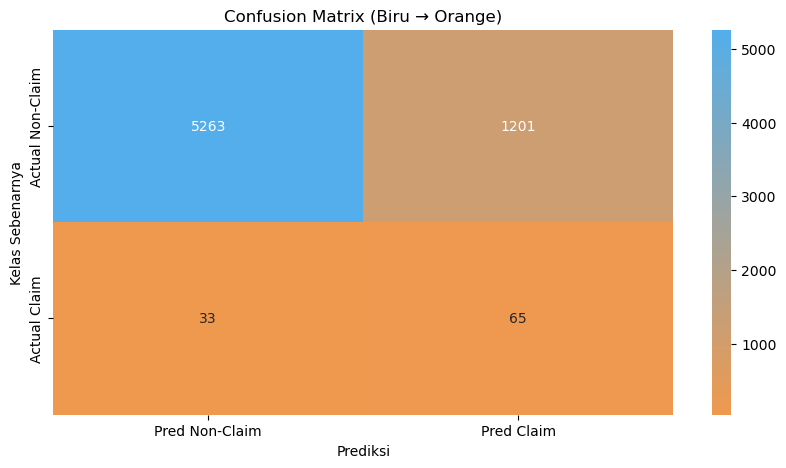

In [184]:
# Buat colormap
colors = ["#ef994e", "#53aeeb"] 
cmap = LinearSegmentedColormap.from_list("blue_orange", colors)

# Plot confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f",
            cmap=cmap,
            xticklabels=["Pred Non-Claim", "Pred Claim"],
            yticklabels=["Actual Non-Claim", "Actual Claim"])
plt.xlabel("Prediksi")
plt.ylabel("Kelas Sebenarnya")
plt.title("Confusion Matrix (Biru → Orange)")
plt.show()

**Hasil Confusion Matrix**
Tidak ada perbedaan dengan model sebelum dituning
Secara keseluruhan, model kurang optimal untuk mendeteksi klaim, meskipun cukup baik memprediksi non-claim.

In [185]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test),
        roc_auc_score(y_test, y_pred_test),  # sebaiknya pakai probabilitas
        accuracy_score(y_test, y_pred_test)
    ]
})

,,Score
0,Recall,0.663265
1,Precision,0.051343
2,ROC-AUC,0.738734
3,Accuracy,0.811948


- **Recall = 0.6633** → Dari semua kasus klaim sebenarnya, model berhasil mendeteksi sekitar 66%. Artinya model cukup sensitif terhadap klaim, meskipun ada sebagian klaim yang terlewat (FN).

- **Precision = 0.0513** → Dari semua prediksi klaim, hanya sekitar 5% yang benar-benar klaim. Nilai rendah ini disebabkan banyak **False Positive (FP)**, wajar pada data klaim yang sangat tidak seimbang.

- **ROC-AUC = 0.7387** → Model mampu membedakan klaim dan non-claim dengan cukup baik; nilai di atas 0.7 menunjukkan performa prediksi memuaskan.

- **Accuracy = 0.8119** → Sekitar 81,2% prediksi model benar secara keseluruhan. Namun karena data sangat tidak seimbang, akurasi bisa menyesatkan karena model benar banyak di kelas non-claim.


In [187]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.90      6464
         1.0       0.05      0.66      0.10        98

    accuracy                           0.81      6562
   macro avg       0.52      0.74      0.50      6562
weighted avg       0.98      0.81      0.88      6562



**Precision, Recall, F1-score**

1. Kelas 0 (Non-claim)
- Precision = 0.99 → Dari semua prediksi non-claim, 99% benar.
- Recall = 0.81 → Dari semua non-claim sebenarnya, 81% terdeteksi dengan benar.
- F1-score = 0.90 → Kombinasi precision dan recall menunjukkan performa baik untuk kelas mayoritas.

2. Kelas 1 (Claim)
- Precision = 0.05 → Dari semua prediksi klaim, hanya 5% benar, banyak False Positive (FP).
- Recall = 0.66 → Dari semua klaim sebenarnya, 66% berhasil terdeteksi (True Positive cukup tinggi).
- F1-score = 0.10 → Karena precision rendah, F1-score juga rendah, menunjukkan performa kelas minor masih lemah.

**Accuracy**

- 0.81 → Sekitar 81% prediksi benar secara keseluruhan, tapi karena data imbalance tinggi (kelas claim sangat kecil), akurasi bisa menyesatkan.


Model cukup sensitif dalam mendeteksi klaim (recall 0.66), tetapi masih banyak prediksi klaim yang salah (precision rendah), sementara performa pada kelas mayoritas sangat baik.

------------

Berdasarkan evaluasi performa model, versi sebelum tuning dan setelah tuning memiliki perbedaan yang tidak signifikan. Recall untuk klaim (kelas 1), yang paling penting di konteks asuransi untuk meminimalkan risiko False Negative (FN), sedikit menurun dari 0.67 menjadi 0.66 setelah tuning. False Negative (FN) yang akan dihindari adalah kasus klaim sebenarnya tapi diprediksi model sebagai non-claim. Ini berisiko bagi perusahaan karena klaim tidak terantisipasi, berpotensi menyebabkan kerugian finansial.

Selain itu, precision dan akurasi juga hampir sama, sedangkan ROC-AUC meningkat hanya sedikit. Oleh karena itu, mengingat tujuan utama adalah memaksimalkan deteksi klaim dan meminimalkan klaim yang terlewat, **model versi default sebelum tuning sudah cukup baik**. Hal ini karena hyperparameter tuning dapat dilakukan untuk optimisasi global (misal ROC-AUC), tetapi tidak memberikan peningkatan signifikan untuk recall klaim, sehingga **versi default lebih sesuai dengan kebutuhan bisnis asuransi.**

------------

## C. Adding Threshold

Threshold penting karena menentukan **pemisahan antara prediksi kelas 0 (non-claim) dan kelas 1 (klaim)** berdasarkan probabilitas model. Dengan memilih threshold yang tepat, kita bisa **mengontrol trade-off antara mendeteksi klaim (minimalkan False Negative) dan menghindari kesalahan prediksi non-claim (False Positive)**. Terutama pada data asuransi yang sangat tidak seimbang, threshold mempengaruhi seberapa sensitif model terhadap klaim, sehingga berdampak langsung pada **risiko finansial perusahaan** dan keandalan prediksi model secara keseluruhan. Threshold dilakukan pada **Best Model Logistic Regression (with oversampling) yang tidak dilakukan tuning.**

In [188]:
y_probs = estimator.predict_proba(x_test_selected)[:,1]
thresholds = np.arange(0.1, 0.9, 0.1)
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    print(f"Threshold = {t}")
    print(classification_report(y_test, y_pred))

Threshold = 0.1
              precision    recall  f1-score   support

         0.0       1.00      0.24      0.38      6464
         1.0       0.02      0.93      0.04        98

    accuracy                           0.25      6562
   macro avg       0.51      0.58      0.21      6562
weighted avg       0.98      0.25      0.38      6562

Threshold = 0.2
              precision    recall  f1-score   support

         0.0       0.99      0.43      0.60      6464
         1.0       0.02      0.85      0.04        98

    accuracy                           0.44      6562
   macro avg       0.51      0.64      0.32      6562
weighted avg       0.98      0.44      0.60      6562

Threshold = 0.30000000000000004
              precision    recall  f1-score   support

         0.0       0.99      0.61      0.75      6464
         1.0       0.03      0.80      0.06        98

    accuracy                           0.61      6562
   macro avg       0.51      0.70      0.41      6562
weighted a

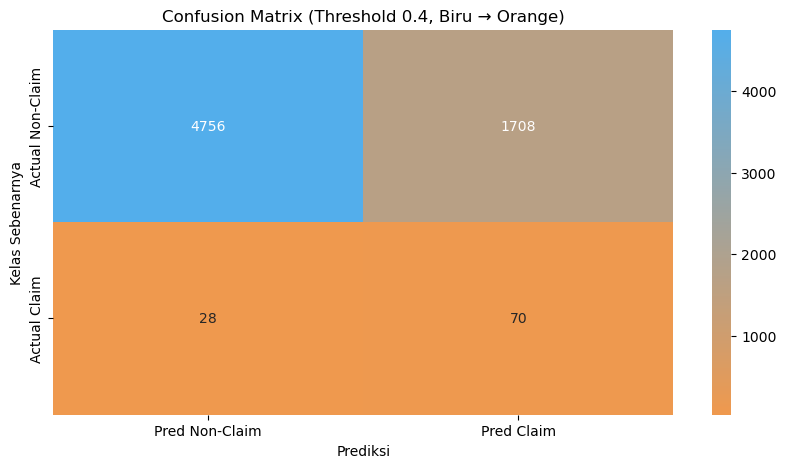

In [189]:
y_pred_04 = (y_probs >= 0.4).astype(int)

# Buat colormap biru → orange
colors = ["#ef994e", "#53aeeb"]  # Biru → Orange
cmap = LinearSegmentedColormap.from_list("blue_orange", colors)

# Hitung confusion matrix
cm_04 = confusion_matrix(y_test, y_pred_04)

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(cm_04, annot=True, fmt=".0f", cmap=cmap,
            xticklabels=["Pred Non-Claim", "Pred Claim"],
            yticklabels=["Actual Non-Claim", "Actual Claim"])
plt.xlabel("Prediksi")
plt.ylabel("Kelas Sebenarnya")
plt.title("Confusion Matrix (Threshold 0.4, Biru → Orange)")
plt.show()

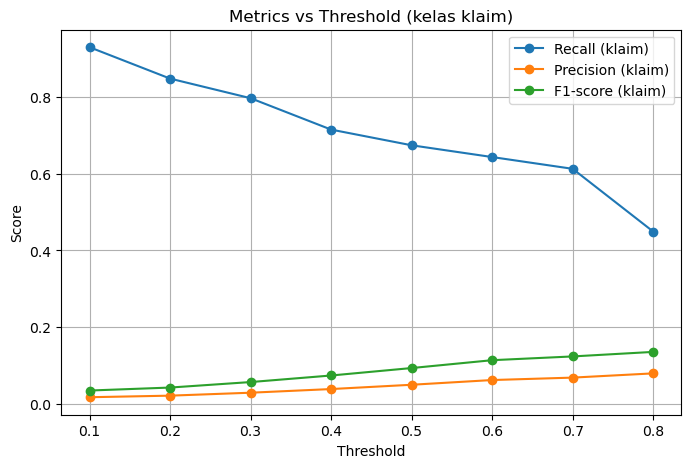

In [190]:
thresholds = np.arange(0.1, 0.9, 0.1)
recalls = []
precisions = []
f1s = []

# Hitung metrik per threshold
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(thresholds, recalls, marker='o', label='Recall (klaim)')
plt.plot(thresholds, precisions, marker='o', label='Precision (klaim)')
plt.plot(thresholds, f1s, marker='o', label='F1-score (klaim)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Threshold (kelas klaim)')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()


- Threshold 0.3 → Klaim hampir semua tertangkap (recall 0.80), tapi banyak non-claim salah terprediksi → recall 0.60, accuracy 0.60.
- Threshold 0.4 → Recall klaim masih tinggi (0.71), recall non-claim cukup baik (0.74), accuracy lebih seimbang (0.74).
- Threshold 0.5 (default) → Recall klaim menurun (0.66), recall non-claim meningkat (0.81), accuracy tinggi (0.81).

Untuk konteks asuransi, disarankan menggunakan **threshold sekitar 0.4.** Dengan threshold ini, **recall klaim tetap cukup tinggi (0.71)** sehingga sebagian besar klaim tertangkap, **meminimalkan risiko False Negative**. Sementara itu, recall non-claim juga masih wajar (0.74) sehingga tidak terlalu banyak kasus non-claim yang salah terprediksi sebagai klaim. Secara keseluruhan, **akurasi model seimbang (0.74)**, menjadikan threshold ini pilihan yang tepat untuk menjaga keseimbangan antara mendeteksi klaim dan mengurangi kesalahan prediksi pada non-claim.

## E. Saving Model

Berdasarkan evaluasi performa model dan proses pemilihan model terbaik, model machine learning yang paling tepat untuk memprediksi klaim Travel Insurance adalah **Logistic Regression** yang dilengkapi dengan **teknik oversampling (SMOTE)** dan menggunakan **threshold prediksi sebesar 0.4.**

In [ ]:
class ThresholdedModel:
    def __init__(self, model, threshold=0.4):
        self.model = model
        self.threshold = threshold

    def predict(self, X):
        proba = self.model.predict_proba(X)[:,1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

In [ ]:
chosen_threshold = 0.4

wrapped_model = ThresholdedModel(model_tuned, threshold=chosen_threshold)


In [ ]:
import pickle

pickle.dump(wrapped_model, open('Capstone_module3_Travel_Insurance.pkl', 'wb'))


## D. Feature Importance

In [ ]:
model = LogisticRegression()
model.fit(x_train_selected, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train_selected.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature Importances')
plt.xticks(rotation='vertical')
plt.show()

Berdasarkan hasil training model, grafik feature importance menunjukkan kontribusi masing-masing fitur terhadap prediksi klaim asuransi perjalanan. Sumbu X pada grafik menampilkan nama-nama fitur, seperti Product Name_2 dan Destination_6, sedangkan sumbu Y menunjukkan besarnya nilai pentingnya fitur. Nilai positif menandakan bahwa fitur tersebut meningkatkan kemungkinan prediksi klaim, nilai negatif menandakan fitur menurunkan kemungkinan prediksi klaim, dan nilai mendekati nol menunjukkan fitur tidak berpengaruh signifikan. Dari grafik, terlihat bahwa `Product Name_2` memiliki nilai importance tertinggi, sehingga memiliki pengaruh terbesar dalam meningkatkan prediksi klaim, sementara `Agency_2` dan `Product Name_7` memiliki nilai negatif signifikan sehingga cenderung menurunkan prediksi klaim. 

Fitur-fitur dengan nilai mendekati nol memiliki pengaruh minimal terhadap prediksi model. Informasi ini dapat dimanfaatkan untuk melakukan feature selection guna meningkatkan efisiensi model serta sebagai dasar analisis bisnis untuk memahami faktor-faktor yang memengaruhi pengajuan klaim.

# VI. Conclusion & Recommendation

## A. Conclusion

In [ ]:
y_pred_test = wrapped_model.predict(x_test_selected)

# Tampilkan classification report
print(classification_report(y_test, y_pred_test, target_names=['Non-Claim', 'Claim']))


- Berdasarkan hasil evaluasi model, didapatkan bahwa **model memiliki akurasi keseluruhan 74%.** 

- Ketepatan prediksi klaim lemah **(precision = 4%)** yang mana seluruh prediksi model hanya 4% yang benar-benar klaim, sementara sisanya 96% adalah prediksi salah (False Positive).

- **Recall klaim 71%** yang mana model berhasil menangkap 71% dari semua kasus klaim yang benar, sisanya 29% klaim nyata tidak terdeteksi (False Negative), sehingga model cukup baik dalam **menghindari prediksi seseorang tidak akan klaim, tapi sebenarnya dia mengajukan klaim.**

- Model cukup **“sensitif” dalam menangkap klaim** (recall tinggi) tapi **tidak presisi** karena banyak prediksi klaim yang salah sehingga dengan model ini perusahaan mungkin memproses klaim yang tidak seharusnya dan biaya dan sumber daya akan terbuang tetapi pada bisnis travel insurance hal ini tidak lebih penting dibandingkan adanya calon klaim yang berhak tapi tidak dikenali oleh sistem.

## B. Recommendation

- Pastikan data calon pelaku perjalanan lengkap, termasuk kolom penting seperti Gender, untuk mengurangi klaim tidak valid.
- Tambahkan fitur relevan terkait klaim, seperti tanggal pengajuan, harga polis, dan syarat ketentuan.
- Fokuskan feature importance pada fitur kuantitatif, dan pastikan fitur kuantitatif seperti durasi perjalanan, umur, dan komisi tidak membebani model.
- Eksperimen lebih lanjut dengan algoritma, hyperparameter, metrik, dan teknik resampling lain untuk meningkatkan performa model.